# Chapter 1: The Machine Learning Landscape

## Complete Theory, Code, and Analysis

This notebook provides a comprehensive analysis of Chapter 1 from "Hands-On Machine Learning" by Aurélien Géron. We'll cover:

1. **Theory**: Core ML concepts and definitions
2. **Code**: Practical implementations and examples
3. **Analysis**: Deep dive into key concepts
4. **Exercises**: Solutions to all chapter questions

---

## 🔧 Setup and Imports

First, let's install required packages and set up our environment for Google Colab.

In [1]:
# Install required packages for Google Colab
!pip install scikit-learn pandas matplotlib numpy seaborn

# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Setup complete!")

✅ Setup complete!


## 📚 What is Machine Learning?

Machine Learning is not just a futuristic fantasy—it's already here and has been transforming our lives for decades.

### 🎯 Key Definitions

**Arthur Samuel (1959)**:
> *"Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed."*

**Tom Mitchell (1997)** - More Engineering-Oriented:
> *"A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."*

### 🔍 Real-World Example: Spam Filter

Let's break down a spam filter using Mitchell's definition:
- **Task (T)**: Flag spam emails
- **Experience (E)**: Training data (spam and ham emails)
- **Performance (P)**: Accuracy (ratio of correctly classified emails)

### 💡 Key Insight
Simply downloading Wikipedia doesn't make your computer "learn" anything. Learning requires:
1. **Training data** (examples)
2. **Learning algorithm** (method to improve)
3. **Performance measure** (way to evaluate)

## 🚀 Why Use Machine Learning?

### Traditional Programming vs Machine Learning

**Traditional Approach Problems:**
1. **Complex rule lists** - Hard to maintain
2. **Manual updates** - Need constant human intervention
3. **Limited adaptability** - Can't handle new patterns automatically

**Machine Learning Advantages:**
1. **Automatic pattern detection** - Finds patterns humans might miss
2. **Self-adaptation** - Automatically adapts to new data
3. **Shorter, cleaner code** - More maintainable solutions
4. **Better performance** - Often outperforms traditional methods

### 🎯 Machine Learning is Great For:

- **Complex problems** with no good traditional solution
- **Fluctuating environments** that require adaptation
- **Problems requiring fine-tuning** or long lists of rules
- **Getting insights** from large amounts of data (data mining)

## 📊 Creating Sample Data for Demonstrations

Let's create sample datasets to demonstrate various ML concepts throughout this notebook.

In [2]:
# Create the famous life satisfaction vs GDP data from the book
def create_life_satisfaction_data():
    """Create sample data similar to the OECD life satisfaction dataset"""

    # Sample data from the book
    countries = ['Hungary', 'Korea', 'France', 'Australia', 'United States',
                'Slovenia', 'Portugal', 'Spain', 'New Zealand', 'Italy',
                'Germany', 'Belgium', 'Austria', 'Netherlands', 'Norway',
                'Switzerland', 'Luxembourg', 'Denmark', 'Iceland', 'Sweden']

    gdp_per_capita = [12240, 27195, 37675, 50962, 55805, 20732, 22439, 28821,
                     37044, 35220, 41267, 40106, 43724, 49866, 67525,
                     56815, 79593, 46682, 46177, 49866]

    life_satisfaction = [4.9, 5.8, 6.5, 7.3, 7.2, 5.7, 5.1, 6.5,
                        7.3, 6.0, 7.0, 6.9, 7.1, 7.4, 7.4,
                        7.5, 6.9, 7.5, 7.5, 7.2]

    return pd.DataFrame({
        'Country': countries,
        'GDP per capita': gdp_per_capita,
        'Life satisfaction': life_satisfaction
    })

# Create the dataset
country_stats = create_life_satisfaction_data()
print("📈 Life Satisfaction Dataset:")
print(country_stats.head(10))
print(f"\n📊 Dataset shape: {country_stats.shape}")

📈 Life Satisfaction Dataset:
         Country  GDP per capita  Life satisfaction
0        Hungary           12240                4.9
1          Korea           27195                5.8
2         France           37675                6.5
3      Australia           50962                7.3
4  United States           55805                7.2
5       Slovenia           20732                5.7
6       Portugal           22439                5.1
7          Spain           28821                6.5
8    New Zealand           37044                7.3
9          Italy           35220                6.0

📊 Dataset shape: (20, 3)


## 🎨 Data Visualization

Let's visualize our data to understand the relationship between GDP and life satisfaction.

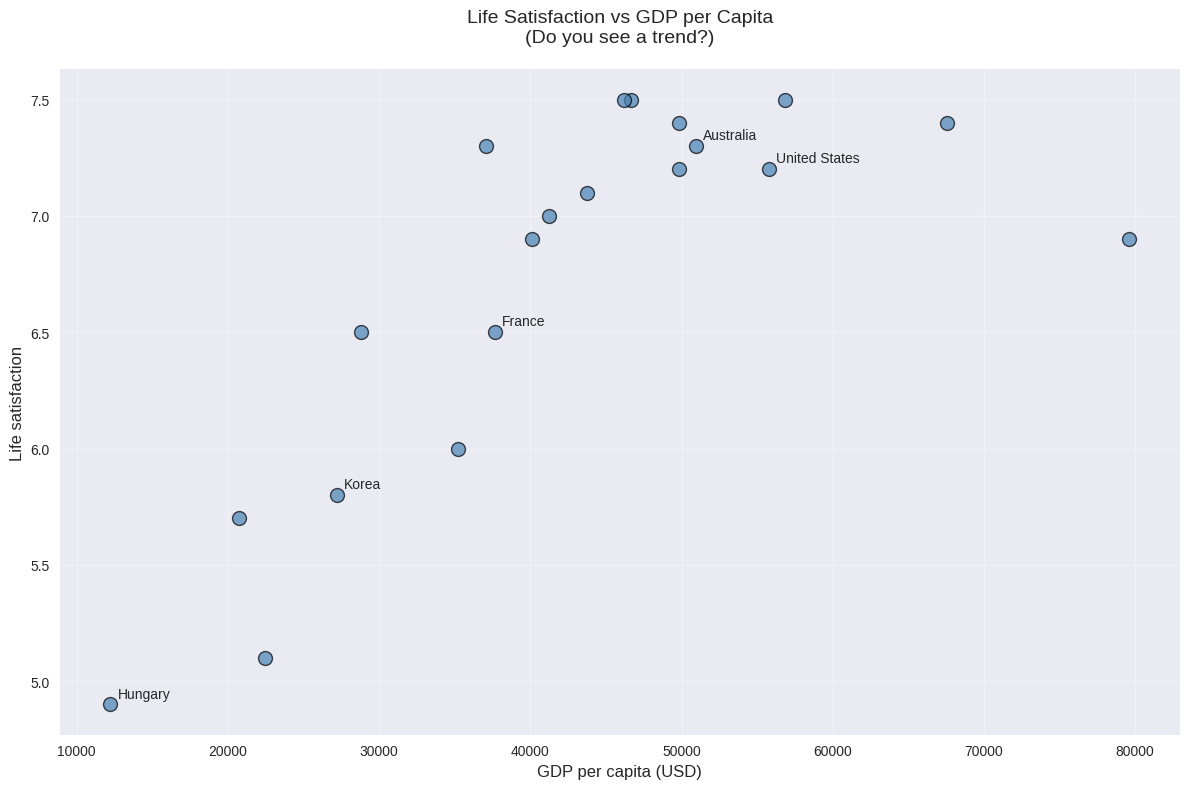

💡 Observation: There appears to be a positive correlation between GDP per capita and life satisfaction!


In [3]:
# Create the main visualization
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(country_stats['GDP per capita'], country_stats['Life satisfaction'],
           alpha=0.7, s=100, c='steelblue', edgecolors='black', linewidth=1)

# Add country labels for some points
for i, country in enumerate(country_stats['Country']):
    if country in ['Hungary', 'Korea', 'France', 'Australia', 'United States']:
        plt.annotate(country,
                    (country_stats['GDP per capita'].iloc[i],
                     country_stats['Life satisfaction'].iloc[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.xlabel('GDP per capita (USD)', fontsize=12)
plt.ylabel('Life satisfaction', fontsize=12)
plt.title('Life Satisfaction vs GDP per Capita\n(Do you see a trend?)', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("💡 Observation: There appears to be a positive correlation between GDP per capita and life satisfaction!")

## 🔄 Types of Machine Learning Systems

ML systems can be classified in broad categories based on:

### 1. 👨‍🏫 Supervision During Training
- **Supervised Learning**: Learning with labeled examples
- **Unsupervised Learning**: Finding patterns in unlabeled data
- **Semisupervised Learning**: Mix of labeled and unlabeled data
- **Reinforcement Learning**: Learning through rewards and penalties

### 2. 📚 Learning Style
- **Batch Learning**: Train on all data at once (offline)
- **Online Learning**: Learn incrementally from streaming data

### 3. 🎯 Generalization Approach
- **Instance-based Learning**: Learn by heart, compare with similarity
- **Model-based Learning**: Build a model, use it for predictions

## 🎓 Supervised Learning

In supervised learning, the training set includes the desired solutions (labels).

### 📋 Common Supervised Learning Tasks:

**Classification**: Predict discrete categories
- Spam detection (spam/ham)
- Image recognition (cat/dog)
- Medical diagnosis (disease/healthy)

**Regression**: Predict continuous values
- House prices
- Stock prices
- Temperature prediction

### 🛠 Popular Supervised Learning Algorithms:
- k-Nearest Neighbors
- Linear Regression
- Logistic Regression
- Support Vector Machines (SVMs)
- Decision Trees and Random Forests
- Neural Networks

## 📈 Implementing Linear Regression (Model-based Learning)

Let's implement the life satisfaction prediction model from the book using Linear Regression.

In [4]:
# Prepare the data for scikit-learn
X = country_stats[['GDP per capita']].values
y = country_stats['Life satisfaction'].values

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Get model parameters
theta0 = model.intercept_
theta1 = model.coef_[0]

print(f"📊 Linear Model: life_satisfaction = {theta0:.2f} + {theta1:.2e} × GDP_per_capita")
print(f"📊 Model Parameters:")
print(f"   θ₀ (intercept) = {theta0:.2f}")
print(f"   θ₁ (slope) = {theta1:.2e}")

# Make a prediction for Cyprus (as in the book)
cyprus_gdp = 22587
cyprus_prediction = model.predict([[cyprus_gdp]])[0]
print(f"\n🇨🇾 Prediction for Cyprus (GDP: ${cyprus_gdp:,}):")
print(f"   Predicted life satisfaction: {cyprus_prediction:.2f}")

# Calculate manual prediction to verify
manual_prediction = theta0 + theta1 * cyprus_gdp
print(f"   Manual calculation: {theta0:.2f} + {theta1:.2e} × {cyprus_gdp} = {manual_prediction:.2f}")

📊 Linear Model: life_satisfaction = 5.09 + 3.87e-05 × GDP_per_capita
📊 Model Parameters:
   θ₀ (intercept) = 5.09
   θ₁ (slope) = 3.87e-05

🇨🇾 Prediction for Cyprus (GDP: $22,587):
   Predicted life satisfaction: 5.96
   Manual calculation: 5.09 + 3.87e-05 × 22587 = 5.96


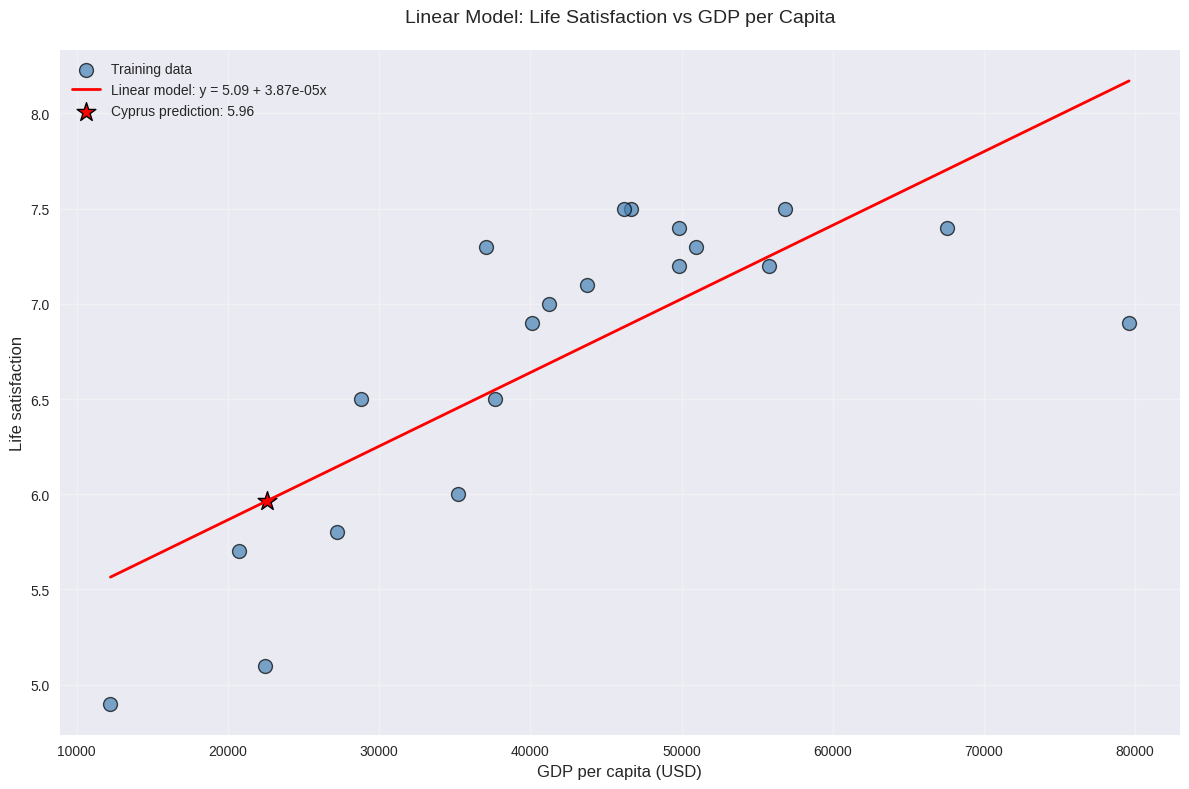

📊 Model Performance: R² = 0.585


In [5]:
# Visualize the linear model
plt.figure(figsize=(12, 8))

# Plot original data
plt.scatter(X, y, alpha=0.7, s=100, c='steelblue',
           edgecolors='black', linewidth=1, label='Training data')

# Plot the fitted line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_range = model.predict(X_range)
plt.plot(X_range, y_pred_range, 'r-', linewidth=2,
         label=f'Linear model: y = {theta0:.2f} + {theta1:.2e}x')

# Highlight Cyprus prediction
plt.scatter([cyprus_gdp], [cyprus_prediction],
           c='red', s=200, marker='*',
           label=f'Cyprus prediction: {cyprus_prediction:.2f}',
           edgecolors='black', linewidth=1)

plt.xlabel('GDP per capita (USD)', fontsize=12)
plt.ylabel('Life satisfaction', fontsize=12)
plt.title('Linear Model: Life Satisfaction vs GDP per Capita', fontsize=14, pad=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(X))
print(f"📊 Model Performance: R² = {r2:.3f}")

## 🔍 k-Nearest Neighbors (Instance-based Learning)

Now let's implement the same problem using k-Nearest Neighbors, an instance-based learning algorithm.

In [6]:
# Create k-NN model
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X, y)

# Make prediction for Cyprus
cyprus_knn_prediction = knn_model.predict([[cyprus_gdp]])[0]

print(f"🔍 k-NN Prediction for Cyprus: {cyprus_knn_prediction:.2f}")
print(f"📈 Linear Regression Prediction: {cyprus_prediction:.2f}")
print(f"📊 Difference: {abs(cyprus_knn_prediction - cyprus_prediction):.2f}")

# Find the 3 nearest neighbors to Cyprus
distances, indices = knn_model.kneighbors([[cyprus_gdp]])
print(f"\n🏘️ Cyprus's 3 Nearest Neighbors:")
for i, idx in enumerate(indices[0]):
    country = country_stats.iloc[idx]['Country']
    gdp = country_stats.iloc[idx]['GDP per capita']
    satisfaction = country_stats.iloc[idx]['Life satisfaction']
    dist = distances[0][i]
    print(f"   {i+1}. {country}: GDP=${gdp:,}, Satisfaction={satisfaction}, Distance={dist:,.0f}")

# Manual calculation
nearest_satisfactions = [country_stats.iloc[idx]['Life satisfaction'] for idx in indices[0]]
manual_knn = np.mean(nearest_satisfactions)
print(f"\n🧮 Manual k-NN calculation: ({'+'.join([str(s) for s in nearest_satisfactions])})/3 = {manual_knn:.2f}")

🔍 k-NN Prediction for Cyprus: 5.53
📈 Linear Regression Prediction: 5.96
📊 Difference: 0.43

🏘️ Cyprus's 3 Nearest Neighbors:
   1. Portugal: GDP=$22,439, Satisfaction=5.1, Distance=148
   2. Slovenia: GDP=$20,732, Satisfaction=5.7, Distance=1,855
   3. Korea: GDP=$27,195, Satisfaction=5.8, Distance=4,608

🧮 Manual k-NN calculation: (5.1+5.7+5.8)/3 = 5.53


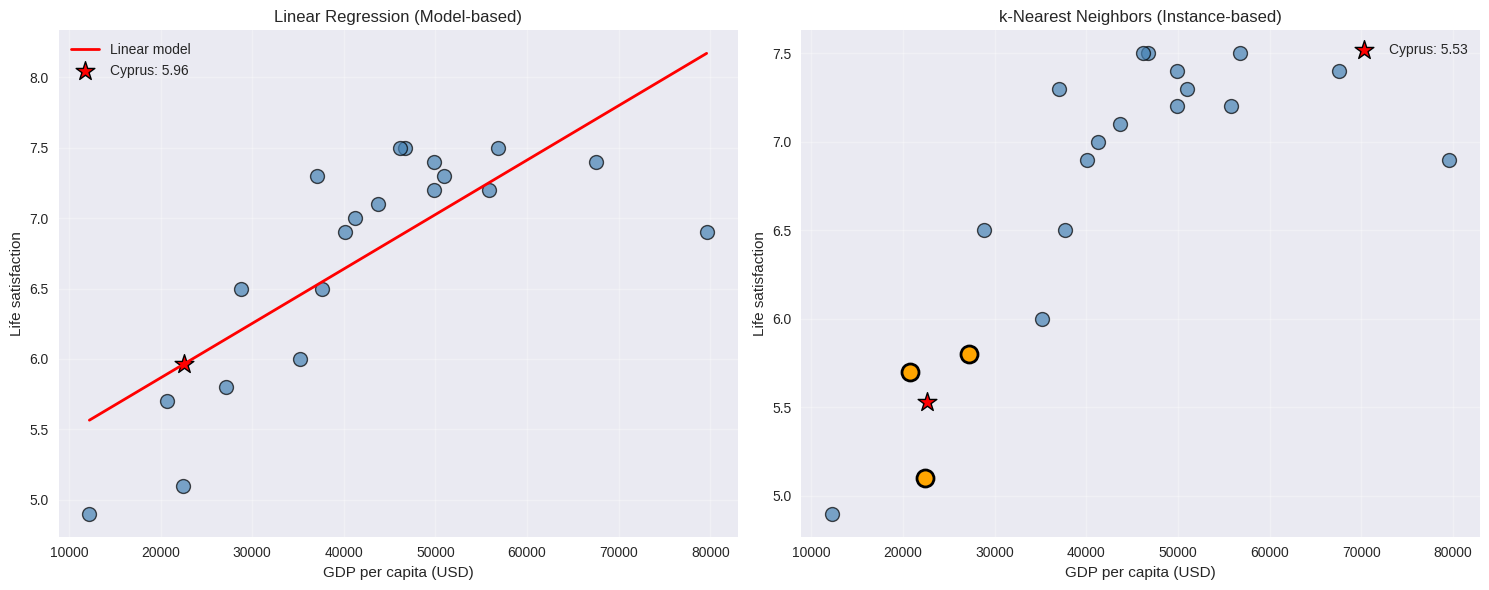

🎯 Comparison Summary:
   Linear Regression: 5.96
   k-NN (k=3): 5.53
   Difference: 0.43


In [7]:
# Visualize both models
plt.figure(figsize=(15, 6))

# Linear Regression subplot
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.7, s=100, c='steelblue', edgecolors='black', linewidth=1)
plt.plot(X_range, y_pred_range, 'r-', linewidth=2, label='Linear model')
plt.scatter([cyprus_gdp], [cyprus_prediction], c='red', s=200, marker='*',
           edgecolors='black', linewidth=1, label=f'Cyprus: {cyprus_prediction:.2f}')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Linear Regression (Model-based)')
plt.legend()
plt.grid(True, alpha=0.3)

# k-NN subplot
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.7, s=100, c='steelblue', edgecolors='black', linewidth=1)

# Highlight the 3 nearest neighbors
for idx in indices[0]:
    neighbor_gdp = country_stats.iloc[idx]['GDP per capita']
    neighbor_satisfaction = country_stats.iloc[idx]['Life satisfaction']
    plt.scatter([neighbor_gdp], [neighbor_satisfaction],
               c='orange', s=150, marker='o', edgecolors='black', linewidth=2)

plt.scatter([cyprus_gdp], [cyprus_knn_prediction], c='red', s=200, marker='*',
           edgecolors='black', linewidth=1, label=f'Cyprus: {cyprus_knn_prediction:.2f}')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('k-Nearest Neighbors (Instance-based)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🎯 Comparison Summary:")
print(f"   Linear Regression: {cyprus_prediction:.2f}")
print(f"   k-NN (k=3): {cyprus_knn_prediction:.2f}")
print(f"   Difference: {abs(cyprus_knn_prediction - cyprus_prediction):.2f}")

## 🔍 Unsupervised Learning

In unsupervised learning, the training data is unlabeled. The system tries to learn without a teacher.

### 🛠 Common Unsupervised Learning Tasks:

**Clustering**: Group similar data points
- Customer segmentation
- Gene sequencing
- Market research

**Anomaly Detection**: Identify unusual patterns
- Fraud detection
- Manufacturing defects
- Network intrusion

**Dimensionality Reduction**: Simplify data while preserving information
- Data visualization
- Feature extraction
- Data compression

**Association Rule Learning**: Find relationships between variables
- Market basket analysis
- Recommendation systems
- Web usage patterns

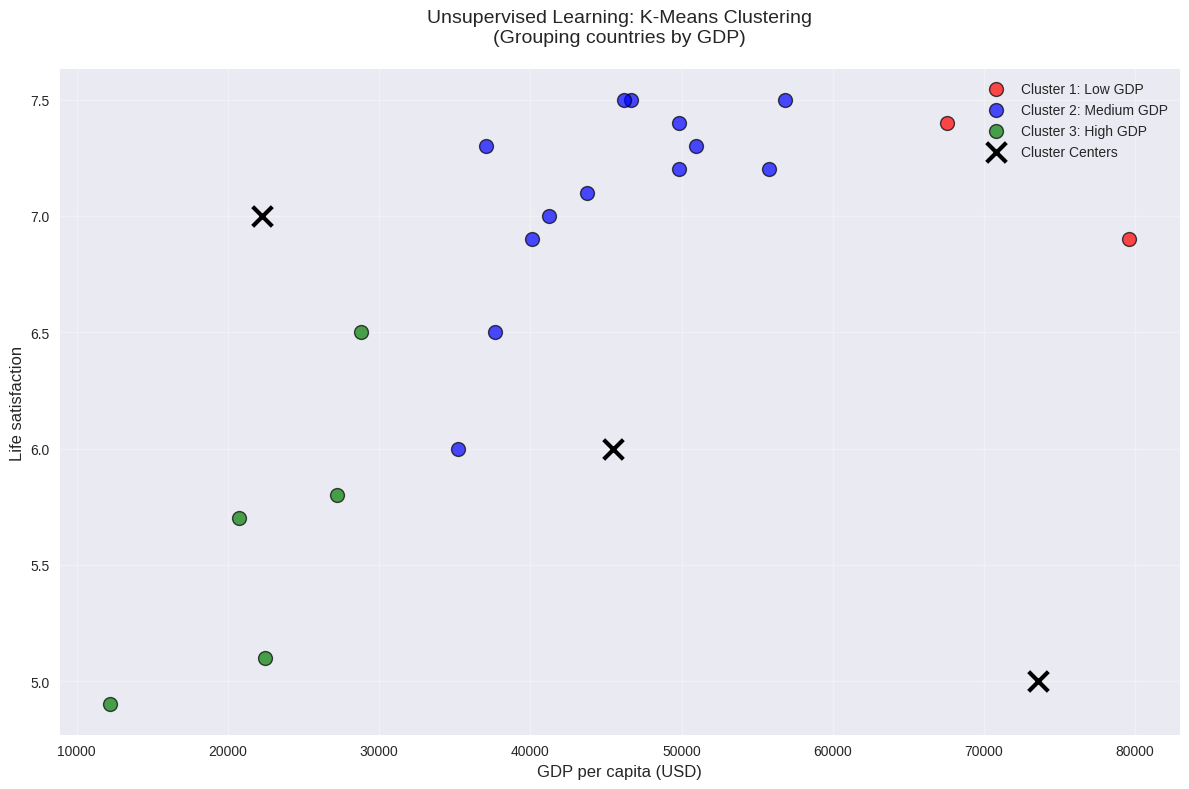

🎯 Clustering Results:
   Cluster 1 (Low GDP): GDP range $67,525 - $79,593
      Countries: Norway, Luxembourg
   Cluster 2 (Medium GDP): GDP range $35,220 - $56,815
      Countries: France, Australia, United States, New Zealand, Italy, Germany, Belgium, Austria, Netherlands, Switzerland, Denmark, Iceland, Sweden
   Cluster 3 (High GDP): GDP range $12,240 - $28,821
      Countries: Hungary, Korea, Slovenia, Portugal, Spain


In [8]:
# Demonstrate clustering with our life satisfaction data
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green']
cluster_names = ['Low GDP', 'Medium GDP', 'High GDP']

for i in range(3):
    cluster_mask = clusters == i
    plt.scatter(X[cluster_mask], y[cluster_mask],
               c=colors[i], s=100, alpha=0.7,
               label=f'Cluster {i+1}: {cluster_names[i]}',
               edgecolors='black', linewidth=1)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], [5, 6, 7], c='black', s=200, marker='x',
           linewidth=3, label='Cluster Centers')

plt.xlabel('GDP per capita (USD)', fontsize=12)
plt.ylabel('Life satisfaction', fontsize=12)
plt.title('Unsupervised Learning: K-Means Clustering\n(Grouping countries by GDP)', fontsize=14, pad=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print cluster information
print("🎯 Clustering Results:")
for i in range(3):
    cluster_countries = country_stats[clusters == i]['Country'].tolist()
    cluster_gdp_range = (X[clusters == i].min(), X[clusters == i].max())
    print(f"   Cluster {i+1} ({cluster_names[i]}): GDP range ${cluster_gdp_range[0]:,.0f} - ${cluster_gdp_range[1]:,.0f}")
    print(f"      Countries: {', '.join(cluster_countries)}")

## ⚠️ Main Challenges of Machine Learning

### 🗃️ Bad Data Problems

1. **Insufficient Quantity of Training Data**
   - Most ML algorithms need thousands/millions of examples
   - "The Unreasonable Effectiveness of Data" (Norvig et al., 2009)

2. **Nonrepresentative Training Data**
   - Sampling bias can lead to poor generalization
   - Example: 1936 Literary Digest poll failure

3. **Poor-Quality Data**
   - Errors, outliers, and noise hurt performance
   - Data cleaning is crucial

4. **Irrelevant Features**
   - "Garbage in, garbage out"
   - Feature engineering is critical

### 🤖 Bad Algorithm Problems

1. **Overfitting** - Model learns training data too well
2. **Underfitting** - Model is too simple for the data

## 📊 Demonstrating Overfitting vs Underfitting

Let's create examples showing the difference between underfitting, good fit, and overfitting.

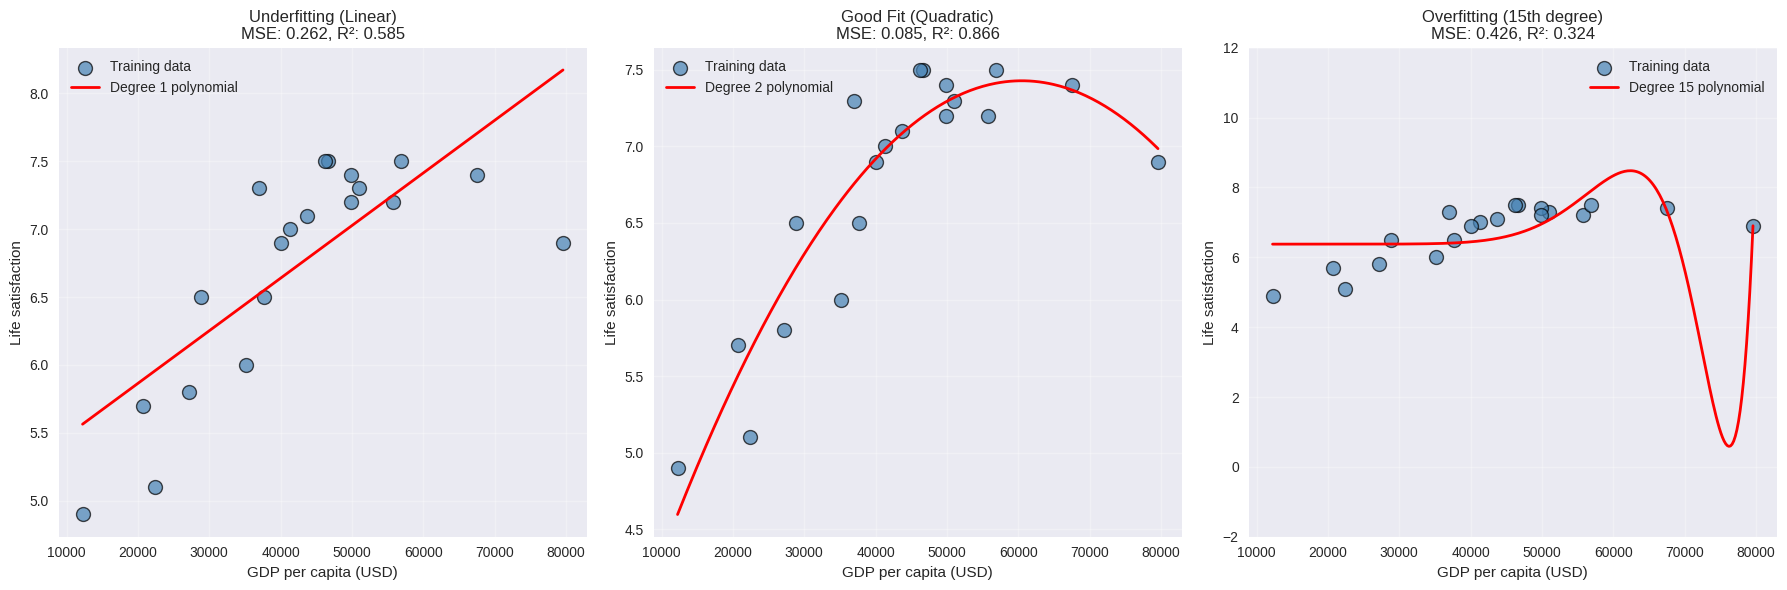

🎯 Overfitting Analysis:
   📉 Underfitting (Linear): Too simple, misses patterns
   ✅ Good Fit (Quadratic): Captures main trend without overfitting
   📈 Overfitting (15th degree): Perfect training fit, but will generalize poorly


In [9]:
# Create polynomial models of different complexity
degrees = [1, 2, 15]  # Linear, quadratic, high-degree polynomial
titles = ['Underfitting (Linear)', 'Good Fit (Quadratic)', 'Overfitting (15th degree)']

plt.figure(figsize=(18, 6))

for i, (degree, title) in enumerate(zip(degrees, titles)):
    plt.subplot(1, 3, i+1)

    # Create polynomial features and fit model
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    # Plot original data
    plt.scatter(X, y, alpha=0.7, s=100, c='steelblue',
               edgecolors='black', linewidth=1, label='Training data')

    # Generate smooth curve for plotting
    X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot_pred = poly_model.predict(X_plot_poly)

    plt.plot(X_plot, y_plot_pred, 'r-', linewidth=2, label=f'Degree {degree} polynomial')

    # Calculate and display training error
    y_pred = poly_model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    plt.xlabel('GDP per capita (USD)')
    plt.ylabel('Life satisfaction')
    plt.title(f'{title}\nMSE: {mse:.3f}, R²: {r2:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Limit y-axis for better visualization
    if degree == 15:
        plt.ylim(-2, 12)

plt.tight_layout()
plt.show()

print("🎯 Overfitting Analysis:")
print("   📉 Underfitting (Linear): Too simple, misses patterns")
print("   ✅ Good Fit (Quadratic): Captures main trend without overfitting")
print("   📈 Overfitting (15th degree): Perfect training fit, but will generalize poorly")

## 🎛️ Regularization: Fighting Overfitting

Regularization constrains the model to make it simpler and reduce overfitting risk.

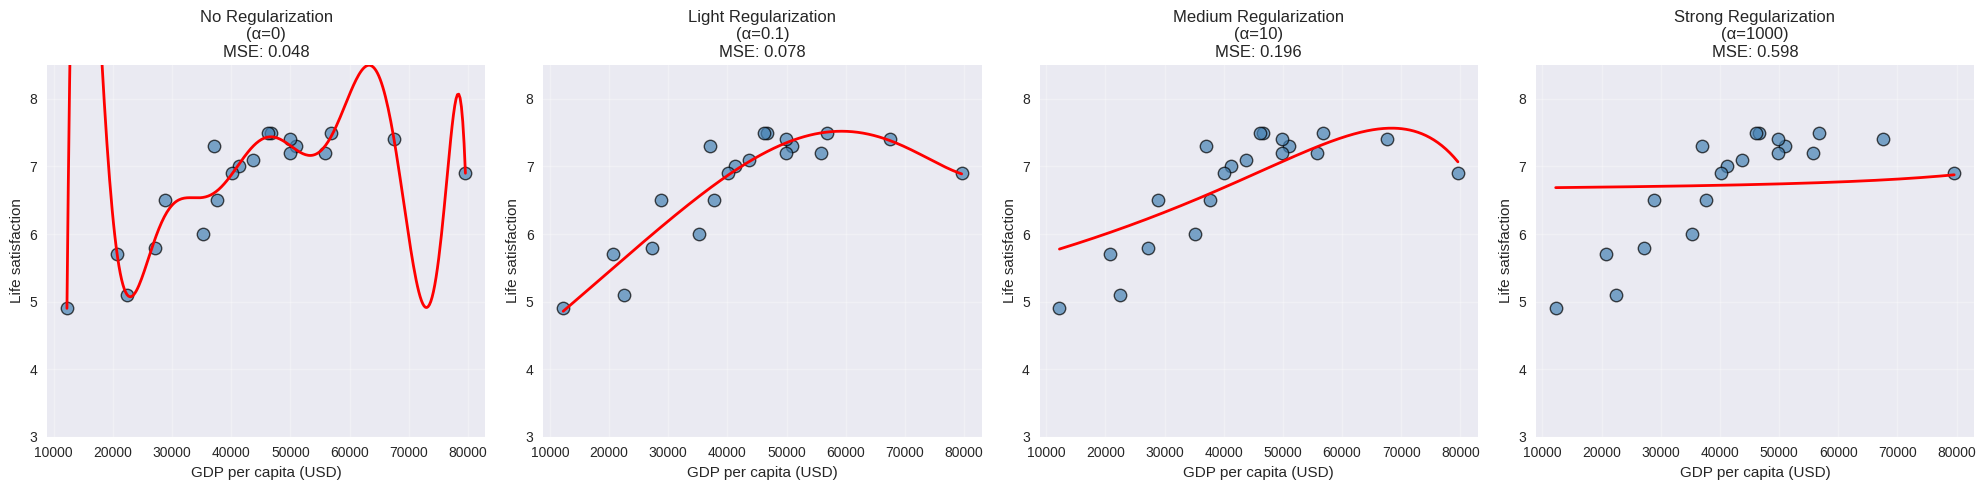

🎛️ Regularization Effects:
   α = 0: No constraint, potential overfitting
   α = 0.1: Light constraint, balanced fit
   α = 10: Medium constraint, smoother curve
   α = 1000: Strong constraint, nearly linear


In [10]:
# Demonstrate regularization with Ridge regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Prepare high-degree polynomial features
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Different regularization strengths
alphas = [0, 0.1, 10, 1000]
alpha_names = ['No Regularization', 'Light Regularization',
               'Medium Regularization', 'Strong Regularization']

plt.figure(figsize=(20, 5))

for i, (alpha, name) in enumerate(zip(alphas, alpha_names)):
    plt.subplot(1, 4, i+1)

    # Fit Ridge regression
    if alpha == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=alpha)

    model.fit(X_poly_scaled, y)

    # Plot original data
    plt.scatter(X, y, alpha=0.7, s=80, c='steelblue',
               edgecolors='black', linewidth=1)

    # Generate predictions for plotting
    X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    X_plot_poly_scaled = scaler.transform(X_plot_poly)
    y_plot_pred = model.predict(X_plot_poly_scaled)

    plt.plot(X_plot, y_plot_pred, 'r-', linewidth=2)

    # Calculate training performance
    y_pred = model.predict(X_poly_scaled)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    plt.xlabel('GDP per capita (USD)')
    plt.ylabel('Life satisfaction')
    plt.title(f'{name}\n(α={alpha})\nMSE: {mse:.3f}')
    plt.grid(True, alpha=0.3)
    plt.ylim(3, 8.5)

plt.tight_layout()
plt.show()

print("🎛️ Regularization Effects:")
print("   α = 0: No constraint, potential overfitting")
print("   α = 0.1: Light constraint, balanced fit")
print("   α = 10: Medium constraint, smoother curve")
print("   α = 1000: Strong constraint, nearly linear")

## 🧪 Testing and Validation

The only way to know how well a model generalizes is to test it on new data.

### 📊 Data Splitting Strategy:
- **Training Set (60%)**: Train the model
- **Validation Set (20%)**: Select best model and tune hyperparameters  
- **Test Set (20%)**: Final evaluation of generalization error

### ⚠️ Important Rules:
1. **Never train on test data**
2. **Don't tune hyperparameters on test data**
3. **Test set should remain unseen until final evaluation**

In [11]:
# Demonstrate proper train/validation/test split
from sklearn.model_selection import train_test_split

# First split: separate test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: separate training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  # 0.25 * 0.8 = 0.2 of total
)

print(f"📊 Data Split Summary:")
print(f"   Total samples: {len(X)}")
print(f"   Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"   Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Model selection using validation set
k_values = [1, 3, 5, 7, 9]
val_scores = []

print(f"\n🔍 Model Selection (k-NN):")
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_pred = knn.predict(X_val)
    val_mse = mean_squared_error(y_val, val_pred)
    val_scores.append(val_mse)
    print(f"   k={k}: Validation MSE = {val_mse:.3f}")

# Select best k
best_k = k_values[np.argmin(val_scores)]
print(f"\n✅ Best k value: {best_k}")

# Train final model on full training data (train + validation)
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_temp, y_temp)  # Train on train + validation

# Final evaluation on test set
test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"\n🎯 Final Model Performance:")
print(f"   Test MSE: {test_mse:.3f}")
print(f"   Test R²: {test_r2:.3f}")
print(f"   Generalization Error Estimate: {test_mse:.3f}")

📊 Data Split Summary:
   Total samples: 20
   Training set: 12 samples (60.0%)
   Validation set: 4 samples (20.0%)
   Test set: 4 samples (20.0%)

🔍 Model Selection (k-NN):
   k=1: Validation MSE = 0.283
   k=3: Validation MSE = 0.215
   k=5: Validation MSE = 0.198
   k=7: Validation MSE = 0.240
   k=9: Validation MSE = 0.295

✅ Best k value: 5

🎯 Final Model Performance:
   Test MSE: 0.416
   Test R²: 0.669
   Generalization Error Estimate: 0.416


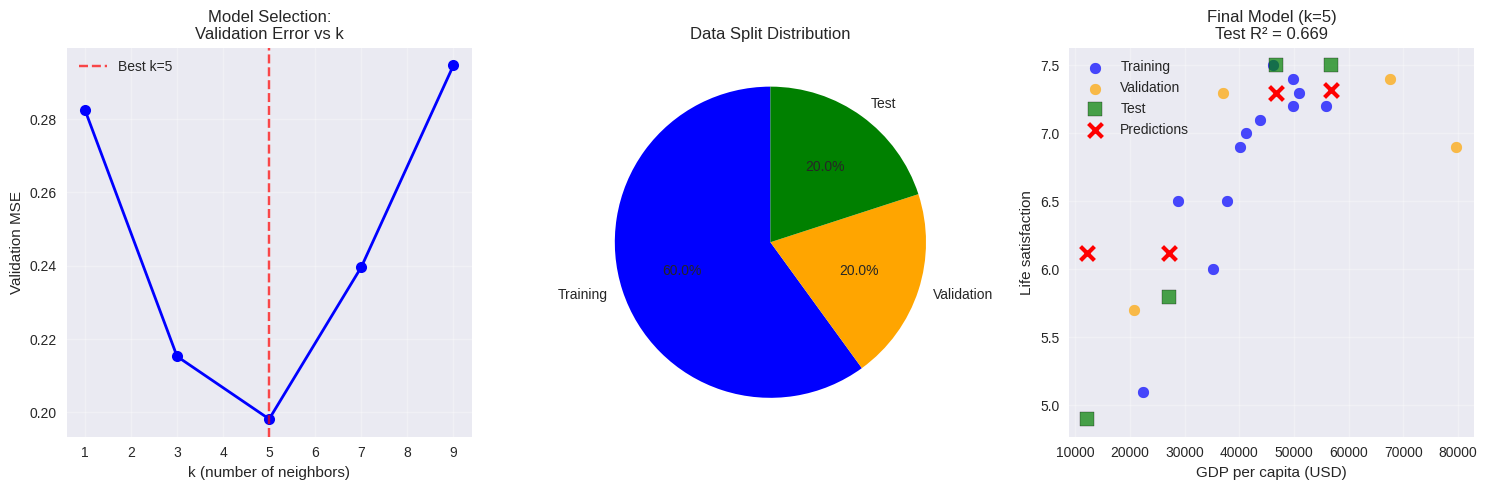

In [12]:
# Visualize model selection process
plt.figure(figsize=(15, 5))

# Plot 1: Validation scores vs k
plt.subplot(1, 3, 1)
plt.plot(k_values, val_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7,
           label=f'Best k={best_k}')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Validation MSE')
plt.title('Model Selection:\nValidation Error vs k')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Data splits visualization
plt.subplot(1, 3, 2)
colors = ['blue', 'orange', 'green']
sets = ['Training', 'Validation', 'Test']
sizes = [len(X_train), len(X_val), len(X_test)]
plt.pie(sizes, labels=sets, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Data Split Distribution')

# Plot 3: Final model performance
plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, c='blue', alpha=0.7, s=60, label='Training')
plt.scatter(X_val, y_val, c='orange', alpha=0.7, s=60, label='Validation')
plt.scatter(X_test, y_test, c='green', alpha=0.7, s=100,
           marker='s', label='Test', edgecolors='black')
plt.scatter(X_test, test_pred, c='red', s=100, marker='x',
           linewidth=3, label='Predictions')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title(f'Final Model (k={best_k})\nTest R² = {test_r2:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔍 **k-Nearest Neighbors: Mathematical Foundation**

### 📐 **Mathematical Definition**

For a query point $x_q$, k-NN finds the $k$ nearest neighbors in the training set $\mathcal{D} = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$.

**Distance Metric (Euclidean):**
$$d(x_i, x_q) = \sqrt{\sum_{j=1}^{p} (x_{ij} - x_{qj})^2}$$

**For 1D case (our GDP data):**
$$d(x_i, x_q) = |x_i - x_q|$$

**k-NN Regression Prediction:**
$$\hat{y}_q = \frac{1}{k} \sum_{i \in \mathcal{N}_k(x_q)} y_i$$

Where $\mathcal{N}_k(x_q)$ is the set of $k$ nearest neighbors to $x_q$.

**Weighted k-NN (Distance-weighted):**
$$\hat{y}_q = \frac{\sum_{i \in \mathcal{N}_k(x_q)} w_i y_i}{\sum_{i \in \mathcal{N}_k(x_q)} w_i}$$

Where $w_i = \frac{1}{d(x_i, x_q) + \epsilon}$ (inverse distance weighting).

In [13]:
class KNNMathematical:
    """
    Mathematical implementation of k-Nearest Neighbors with detailed analysis
    """

    def __init__(self, k=3, weights='uniform'):
        self.k = k
        self.weights = weights  # 'uniform' or 'distance'
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Store training data (lazy learning)
        """
        self.X_train = X.copy()
        self.y_train = y.copy()
        return self

    def euclidean_distance(self, x1, x2):
        """
        Calculate Euclidean distance
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):
        """
        Calculate Manhattan distance
        """
        return np.sum(np.abs(x1 - x2))

    def find_neighbors(self, x_query, distance_metric='euclidean'):
        """
        Find k nearest neighbors with detailed analysis
        """
        distances = []

        for i, x_train in enumerate(self.X_train):
            if distance_metric == 'euclidean':
                dist = self.euclidean_distance(x_query, x_train)
            elif distance_metric == 'manhattan':
                dist = self.manhattan_distance(x_query, x_train)
            else:
                dist = abs(x_query - x_train)  # 1D case

            distances.append((dist, i, self.y_train[i]))

        # Sort by distance
        distances.sort(key=lambda x: x[0])

        # Return k nearest neighbors
        return distances[:self.k]

    def predict_single(self, x_query, return_details=False):
        """
        Predict for a single query point with mathematical details
        """
        neighbors = self.find_neighbors(x_query)

        if self.weights == 'uniform':
            # Simple average
            prediction = np.mean([neighbor[2] for neighbor in neighbors])
            weights = [1/self.k] * self.k
        else:
            # Distance-weighted average
            epsilon = 1e-8  # Avoid division by zero
            weights = [1/(neighbor[0] + epsilon) for neighbor in neighbors]
            weight_sum = sum(weights)
            weights = [w/weight_sum for w in weights]  # Normalize

            prediction = sum(w * neighbor[2] for w, neighbor in zip(weights, neighbors))

        if return_details:
            return prediction, neighbors, weights
        return prediction

    def predict(self, X):
        """
        Predict for multiple points
        """
        if np.isscalar(X):
            return self.predict_single(X)
        return np.array([self.predict_single(x) for x in X])

    def cross_validation_score(self, X, y, cv_folds=5):
        """
        Perform cross-validation to evaluate model
        """
        n = len(X)
        fold_size = n // cv_folds
        scores = []

        for fold in range(cv_folds):
            # Create train/test split for this fold
            start_idx = fold * fold_size
            end_idx = start_idx + fold_size if fold < cv_folds - 1 else n

            test_indices = list(range(start_idx, end_idx))
            train_indices = [i for i in range(n) if i not in test_indices]

            X_train_fold = X[train_indices]
            y_train_fold = y[train_indices]
            X_test_fold = X[test_indices]
            y_test_fold = y[test_indices]

            # Fit and predict
            self.fit(X_train_fold, y_train_fold)
            y_pred = self.predict(X_test_fold)

            # Calculate R² score
            ss_res = np.sum((y_test_fold - y_pred) ** 2)
            ss_tot = np.sum((y_test_fold - np.mean(y_test_fold)) ** 2)
            r2 = 1 - (ss_res / ss_tot)
            scores.append(r2)

        return np.array(scores)

# Comprehensive k-NN analysis
print("🔍 k-Nearest Neighbors: Mathematical Analysis")
print("=" * 50)

# Test different k values
k_values = [1, 3, 5, 7, 9, 11]
cyprus_gdp = 22587

print(f"\n🇨🇾 Cyprus Prediction Analysis (GDP: ${cyprus_gdp:,}):")
print("-" * 60)

for k in k_values:
    # Uniform weights
    knn_uniform = KNNMathematical(k=k, weights='uniform')
    knn_uniform.fit(X, y)
    pred_uniform, neighbors, weights = knn_uniform.predict_single(cyprus_gdp, return_details=True)

    # Distance weights
    knn_distance = KNNMathematical(k=k, weights='distance')
    knn_distance.fit(X, y)
    pred_distance = knn_distance.predict_single(cyprus_gdp)

    print(f"\nk = {k}:")
    print(f"   Uniform weights:  {pred_uniform:.4f}")
    print(f"   Distance weights: {pred_distance:.4f}")

    # Show neighbors for k=3 as detailed example
    if k == 3:
        print(f"\n   📍 Detailed Analysis for k=3:")
        for i, (dist, idx, satisfaction) in enumerate(neighbors):
            country = country_stats.iloc[idx]['Country']
            gdp = country_stats.iloc[idx]['GDP per capita']
            print(f"      Neighbor {i+1}: {country}")
            print(f"         GDP: ${gdp:,}, Distance: {dist:,.0f}")
            print(f"         Life Satisfaction: {satisfaction}, Weight: {weights[i]:.4f}")

        # Manual calculation verification
        manual_uniform = np.mean([neighbor[2] for neighbor in neighbors])
        print(f"\n   🧮 Manual uniform calculation:")
        neighbor_values = [neighbor[2] for neighbor in neighbors]
        print(f"      ({' + '.join([str(v) for v in neighbor_values])}) / {k} = {manual_uniform:.4f}")
        print(f"      Matches prediction: {abs(manual_uniform - pred_uniform) < 1e-10}")

🔍 k-Nearest Neighbors: Mathematical Analysis

🇨🇾 Cyprus Prediction Analysis (GDP: $22,587):
------------------------------------------------------------

k = 1:
   Uniform weights:  5.1000
   Distance weights: 5.1000

k = 3:
   Uniform weights:  5.5333
   Distance weights: 5.1633

   📍 Detailed Analysis for k=3:
      Neighbor 1: Portugal
         GDP: $22,439, Distance: 148
         Life Satisfaction: 5.1, Weight: 0.3333
      Neighbor 2: Slovenia
         GDP: $20,732, Distance: 1,855
         Life Satisfaction: 5.7, Weight: 0.3333
      Neighbor 3: Korea
         GDP: $27,195, Distance: 4,608
         Life Satisfaction: 5.8, Weight: 0.3333

   🧮 Manual uniform calculation:
      (5.1 + 5.7 + 5.8) / 3 = 5.5333
      Matches prediction: True

k = 5:
   Uniform weights:  5.6000
   Distance weights: 5.1876

k = 7:
   Uniform weights:  5.9000
   Distance weights: 5.2142

k = 9:
   Uniform weights:  6.0778
   Distance weights: 5.2367

k = 11:
   Uniform weights:  6.2545
   Distance weight


📊 k-NN Bias-Variance Analysis


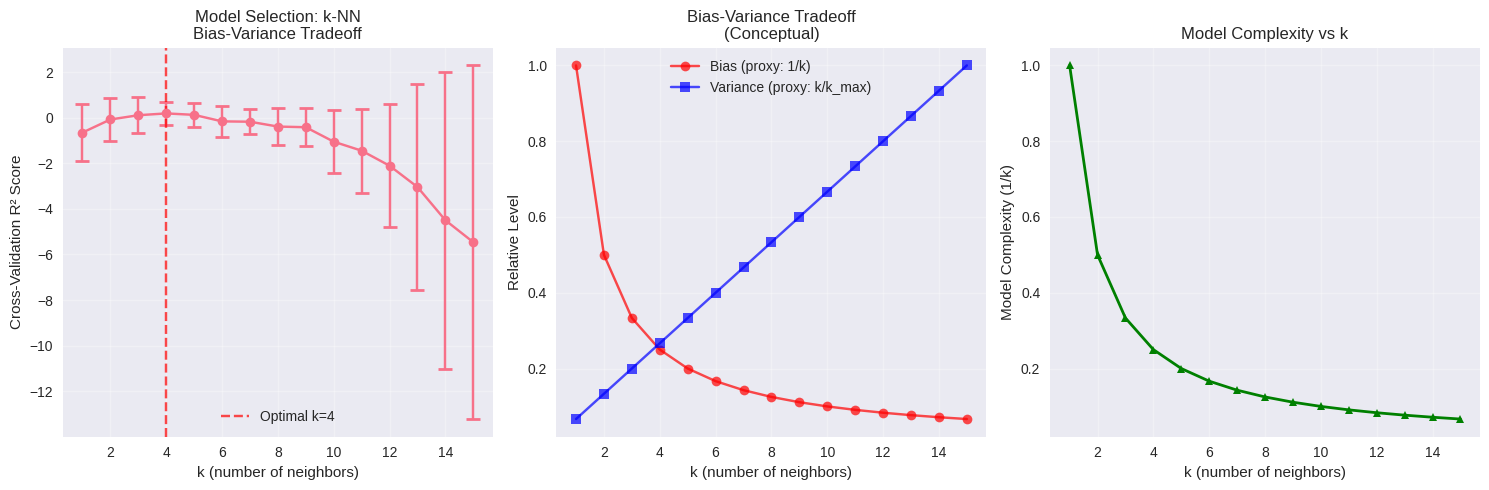


📈 Results:
   Optimal k: 4
   Best CV score: 0.1899 ± 0.5215

🧠 Interpretation:
   k=1: High variance (overfitting), low bias
   k→∞: Low variance (underfitting), high bias
   k=4: Optimal bias-variance tradeoff


In [14]:
# Bias-Variance Analysis for k-NN
def analyze_knn_bias_variance():
    """
    Analyze bias-variance tradeoff in k-NN
    """
    print("\n📊 k-NN Bias-Variance Analysis")
    print("=" * 35)

    k_range = range(1, 16)
    cv_scores = []
    cv_stds = []

    for k in k_range:
        knn = KNNMathematical(k=k)
        scores = knn.cross_validation_score(X, y, cv_folds=5)
        cv_scores.append(np.mean(scores))
        cv_stds.append(np.std(scores))

    # Find optimal k
    optimal_k = k_range[np.argmax(cv_scores)]

    # Visualization
    plt.figure(figsize=(15, 5))

    # CV Score vs k
    plt.subplot(1, 3, 1)
    plt.errorbar(k_range, cv_scores, yerr=cv_stds, marker='o', capsize=5, capthick=2)
    plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k={optimal_k}')
    plt.xlabel('k (number of neighbors)')
    plt.ylabel('Cross-Validation R² Score')
    plt.title('Model Selection: k-NN\nBias-Variance Tradeoff')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Bias interpretation
    plt.subplot(1, 3, 2)
    bias_proxy = [1/k for k in k_range]  # As k increases, bias increases
    variance_proxy = [k/max(k_range) for k in k_range]  # As k increases, variance decreases

    plt.plot(k_range, bias_proxy, 'r-o', label='Bias (proxy: 1/k)', alpha=0.7)
    plt.plot(k_range, variance_proxy, 'b-s', label='Variance (proxy: k/k_max)', alpha=0.7)
    plt.xlabel('k (number of neighbors)')
    plt.ylabel('Relative Level')
    plt.title('Bias-Variance Tradeoff\n(Conceptual)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Model complexity
    plt.subplot(1, 3, 3)
    complexity = [1/k for k in k_range]  # Higher k = lower complexity
    plt.plot(k_range, complexity, 'g-^', linewidth=2, markersize=6)
    plt.xlabel('k (number of neighbors)')
    plt.ylabel('Model Complexity (1/k)')
    plt.title('Model Complexity vs k')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\n📈 Results:")
    print(f"   Optimal k: {optimal_k}")
    print(f"   Best CV score: {max(cv_scores):.4f} ± {cv_stds[np.argmax(cv_scores)]:.4f}")

    print(f"\n🧠 Interpretation:")
    print(f"   k=1: High variance (overfitting), low bias")
    print(f"   k→∞: Low variance (underfitting), high bias")
    print(f"   k={optimal_k}: Optimal bias-variance tradeoff")

    return optimal_k, cv_scores, cv_stds

optimal_k, cv_scores, cv_stds = analyze_knn_bias_variance()

## 🔍 **Unsupervised Learning: Mathematical Foundations**

### 🎯 **K-Means Clustering**

**Objective Function:**
$$J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

Where:
- $C_i$ is the $i$-th cluster
- $\mu_i$ is the centroid of cluster $C_i$
- $\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$

**Algorithm:**
1. Initialize $k$ centroids randomly
2. **Assignment step**: $C_i = \{x : ||x - \mu_i|| \leq ||x - \mu_j|| \forall j\}$
3. **Update step**: $\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$
4. Repeat 2-3 until convergence

### 📊 **Principal Component Analysis (PCA)**

**Objective:** Find directions of maximum variance

**Covariance Matrix:**
$$\mathbf{C} = \frac{1}{n-1} \mathbf{X}^T \mathbf{X}$$

**Principal Components:** Eigenvectors of $\mathbf{C}$
$$\mathbf{C} \mathbf{v}_i = \lambda_i \mathbf{v}_i$$

**Explained Variance Ratio:**
$$\text{EVR}_i = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}$$

In [15]:
class UnsupervisedLearningMath:
    """
    Mathematical implementation of unsupervised learning algorithms
    """

    @staticmethod
    def kmeans_manual(X, k, max_iters=100, random_state=42):
        """
        Manual implementation of K-means with mathematical details
        """
        np.random.seed(random_state)
        n, p = X.shape

        # Initialize centroids randomly
        centroids = np.random.rand(k, p)

        # Scale to data range
        for j in range(p):
            centroids[:, j] = centroids[:, j] * (X[:, j].max() - X[:, j].min()) + X[:, j].min()

        history = {'centroids': [], 'assignments': [], 'inertia': []}

        for iteration in range(max_iters):
            # Assignment step: assign each point to nearest centroid
            distances = np.sqrt(((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
            assignments = np.argmin(distances, axis=1)

            # Calculate inertia (within-cluster sum of squares)
            inertia = 0
            for i in range(k):
                cluster_points = X[assignments == i]
                if len(cluster_points) > 0:
                    inertia += np.sum((cluster_points - centroids[i]) ** 2)

            history['centroids'].append(centroids.copy())
            history['assignments'].append(assignments.copy())
            history['inertia'].append(inertia)

            # Update step: recalculate centroids
            new_centroids = np.zeros_like(centroids)
            for i in range(k):
                cluster_points = X[assignments == i]
                if len(cluster_points) > 0:
                    new_centroids[i] = np.mean(cluster_points, axis=0)
                else:
                    new_centroids[i] = centroids[i]  # Keep old centroid if cluster is empty

            # Check for convergence
            if np.allclose(centroids, new_centroids, rtol=1e-6):
                print(f"K-means converged after {iteration + 1} iterations")
                break

            centroids = new_centroids

        return assignments, centroids, history

    @staticmethod
    def pca_manual(X, n_components=None):
        """
        Manual PCA implementation with mathematical details
        """
        # Center the data
        X_centered = X - np.mean(X, axis=0)

        # Calculate covariance matrix
        n = X.shape[0]
        cov_matrix = (X_centered.T @ X_centered) / (n - 1)

        # Eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort by eigenvalues (descending)
        sort_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sort_indices]
        eigenvectors = eigenvectors[:, sort_indices]

        # Calculate explained variance ratio
        explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

        if n_components is not None:
            eigenvectors = eigenvectors[:, :n_components]
            eigenvalues = eigenvalues[:n_components]
            explained_variance_ratio = explained_variance_ratio[:n_components]

        # Transform data
        X_transformed = X_centered @ eigenvectors

        return {
            'transformed_data': X_transformed,
            'components': eigenvectors,
            'eigenvalues': eigenvalues,
            'explained_variance_ratio': explained_variance_ratio,
            'mean': np.mean(X, axis=0),
            'cov_matrix': cov_matrix
        }

# Comprehensive unsupervised analysis
print("🔍 Unsupervised Learning: Mathematical Analysis")
print("=" * 50)

# Prepare 2D data for clustering
X_2d = country_stats[['GDP per capita', 'Life satisfaction']].values

# K-means analysis
print("\n📊 K-Means Clustering Analysis:")
print("-" * 35)

# Test different k values
k_range = range(2, 8)
inertias = []
silhouette_scores = []

from sklearn.metrics import silhouette_score

for k in k_range:
    assignments, centroids, history = UnsupervisedLearningMath.kmeans_manual(X_2d, k)
    final_inertia = history['inertia'][-1]
    inertias.append(final_inertia)

    if k > 1:
        sil_score = silhouette_score(X_2d, assignments)
        silhouette_scores.append(sil_score)

    print(f"k={k}: Inertia={final_inertia:.2f}, Iterations={len(history['inertia'])}")

# Elbow method
print(f"\n📈 Elbow Method Analysis:")
differences = np.diff(inertias)
second_differences = np.diff(differences)
elbow_k = k_range[np.argmax(second_differences) + 2]  # +2 due to double diff
print(f"   Suggested k (elbow): {elbow_k}")

# Silhouette analysis
if silhouette_scores:
    optimal_sil_k = k_range[np.argmax(silhouette_scores) + 1]  # +1 because we skip k=1
    print(f"   Optimal k (silhouette): {optimal_sil_k}")
    print(f"   Best silhouette score: {max(silhouette_scores):.4f}")

🔍 Unsupervised Learning: Mathematical Analysis

📊 K-Means Clustering Analysis:
-----------------------------------
K-means converged after 5 iterations
k=2: Inertia=1939784977.62, Iterations=5
K-means converged after 2 iterations
k=3: Inertia=1039911476.62, Iterations=2
K-means converged after 2 iterations
k=4: Inertia=913773899.56, Iterations=2
K-means converged after 2 iterations
k=5: Inertia=266499817.29, Iterations=2
K-means converged after 2 iterations
k=6: Inertia=266499817.29, Iterations=2
K-means converged after 3 iterations
k=7: Inertia=209964340.29, Iterations=3

📈 Elbow Method Analysis:
   Suggested k (elbow): 4
   Optimal k (silhouette): 6
   Best silhouette score: 0.5178


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

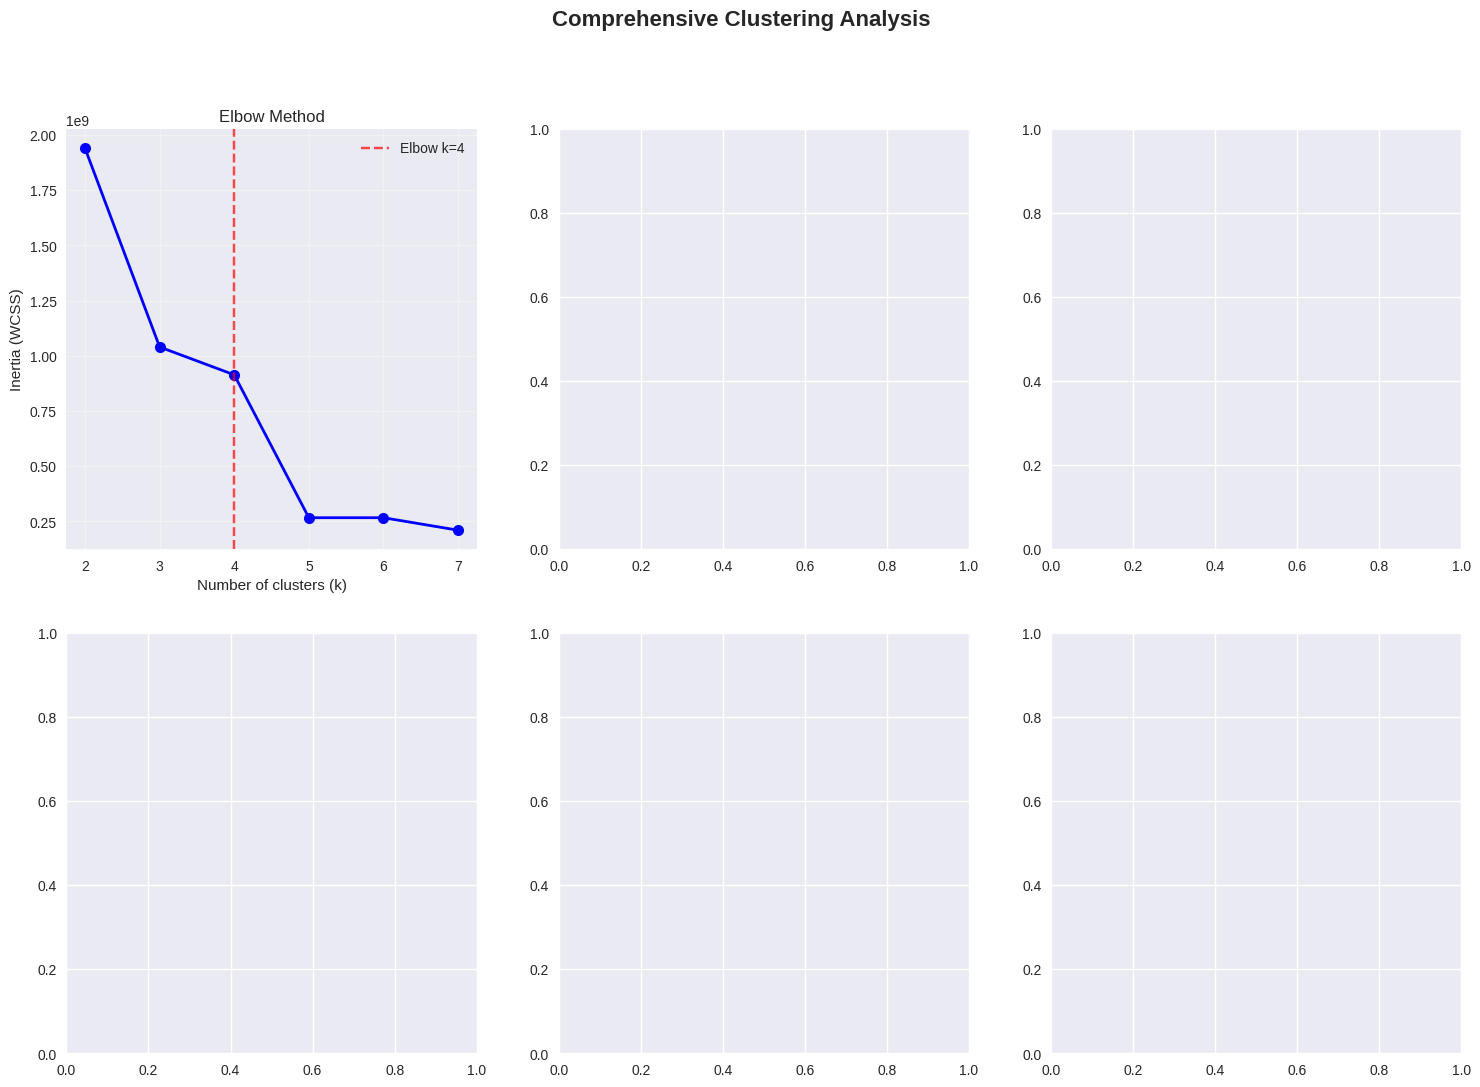

In [16]:
# Comprehensive clustering visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comprehensive Clustering Analysis', fontsize=16, fontweight='bold')

# 1. Elbow method
axes[0, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7, label=f'Elbow k={elbow_k}')
axes[0, 0].set_xlabel('Number of clusters (k)')
axes[0, 0].set_ylabel('Inertia (WCSS)')
axes[0, 0].set_title('Elbow Method')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Silhouette scores
if silhouette_scores:
    axes[0, 1].plot(k_range[1:], silhouette_scores, 'go-', linewidth=2, markersize=8)
    axes[0, 1].axvline(x=optimal_sil_k, color='red', linestyle='--', alpha=0.7,
                      label=f'Optimal k={optimal_sil_k}')
    axes[0, 1].set_xlabel('Number of clusters (k)')
    axes[0, 1].set_ylabel('Silhouette Score')
    axes[0, 1].set_title('Silhouette Analysis')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# 3. Optimal clustering result
optimal_k = 3  # Use 3 clusters for interpretation
assignments, centroids, history = UnsupervisedLearningMath.kmeans_manual(X_2d, optimal_k)

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(optimal_k):
    cluster_points = X_2d[assignments == i]
    axes[0, 2].scatter(cluster_points[:, 0], cluster_points[:, 1],
                      c=colors[i], alpha=0.7, s=100,
                      label=f'Cluster {i+1}', edgecolors='black')

# Plot centroids
axes[0, 2].scatter(centroids[:, 0], centroids[:, 1],
                  c='black', marker='x', s=200, linewidth=3, label='Centroids')

axes[0, 2].set_xlabel('GDP per capita (USD)')
axes[0, 2].set_ylabel('Life satisfaction')
axes[0, 2].set_title(f'K-Means Clustering (k={optimal_k})')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. PCA Analysis
pca_result = UnsupervisedLearningMath.pca_manual(X_2d)

# Plot explained variance
axes[1, 0].bar(range(1, len(pca_result['explained_variance_ratio']) + 1),
              pca_result['explained_variance_ratio'], alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Principal Component')
axes[1, 0].set_ylabel('Explained Variance Ratio')
axes[1, 0].set_title('PCA: Explained Variance')
axes[1, 0].grid(True, alpha=0.3)

# Add percentage labels
for i, ratio in enumerate(pca_result['explained_variance_ratio']):
    axes[1, 0].text(i + 1, ratio + 0.01, f'{ratio:.1%}',
                   ha='center', va='bottom', fontweight='bold')

# 5. PCA transformed data
pc1 = pca_result['transformed_data'][:, 0]
pc2 = pca_result['transformed_data'][:, 1]

axes[1, 1].scatter(pc1, pc2, alpha=0.7, s=100, c='steelblue', edgecolors='black')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].set_xlabel(f'PC1 ({pca_result["explained_variance_ratio"][0]:.1%} variance)')
axes[1, 1].set_ylabel(f'PC2 ({pca_result["explained_variance_ratio"][1]:.1%} variance)')
axes[1, 1].set_title('PCA Transformed Data')
axes[1, 1].grid(True, alpha=0.3)

# 6. Covariance matrix heatmap
im = axes[1, 2].imshow(pca_result['cov_matrix'], cmap='coolwarm', aspect='auto')
axes[1, 2].set_xticks([0, 1])
axes[1, 2].set_yticks([0, 1])
axes[1, 2].set_xticklabels(['GDP', 'Life Sat.'])
axes[1, 2].set_yticklabels(['GDP', 'Life Sat.'])
axes[1, 2].set_title('Covariance Matrix')

# Add correlation values
for i in range(2):
    for j in range(2):
        text = axes[1, 2].text(j, i, f'{pca_result["cov_matrix"][i, j]:.0f}',
                              ha="center", va="center", color="white", fontweight='bold')

plt.colorbar(im, ax=axes[1, 2], shrink=0.6)
plt.tight_layout()
plt.show()

# Mathematical summary
print(f"\n🔍 Mathematical Summary:")
print(f"\n📊 K-Means Results (k={optimal_k}):")
print(f"   Final inertia: {history['inertia'][-1]:.2f}")
print(f"   Convergence: {len(history['inertia'])} iterations")

for i in range(optimal_k):
    cluster_size = np.sum(assignments == i)
    cluster_gdp_mean = np.mean(X_2d[assignments == i, 0])
    cluster_ls_mean = np.mean(X_2d[assignments == i, 1])
    print(f"   Cluster {i+1}: {cluster_size} countries, μ_GDP=${cluster_gdp_mean:,.0f}, μ_LS={cluster_ls_mean:.1f}")

print(f"\n📈 PCA Results:")
print(f"   PC1 explains {pca_result['explained_variance_ratio'][0]:.1%} of variance")
print(f"   PC2 explains {pca_result['explained_variance_ratio'][1]:.1%} of variance")
print(f"   Total variance explained: {sum(pca_result['explained_variance_ratio']):.1%}")
print(f"   Eigenvalues: λ₁={pca_result['eigenvalues'][0]:.1e}, λ₂={pca_result['eigenvalues'][1]:.1e}")

## ⚖️ **Overfitting & Underfitting: Mathematical Analysis**

### 📈 **Bias-Variance Decomposition**

For any learning algorithm, the expected test error can be decomposed as:

$$E[(y - \hat{f}(x))^2] = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

Where:
- **Bias**: $\text{Bias}^2 = (E[\hat{f}(x)] - f(x))^2$
- **Variance**: $\text{Var}(\hat{f}(x)) = E[\hat{f}(x)^2] - E[\hat{f}(x)]^2$
- **Irreducible Error**: $\sigma^2$ (noise in data)

### 🎯 **Model Complexity Analysis**

**Polynomial Regression of degree $d$:**
$$h(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + ... + \theta_d x^d$$

**Training Error** (typically decreases with complexity)
**Validation Error** (U-shaped curve - decreases then increases)

### 🎛️ **Regularization Mathematics**

**Ridge Regression (L2 regularization):**
$$J(\boldsymbol{\theta}) = \frac{1}{2m}||\mathbf{X}\boldsymbol{\theta} - \mathbf{y}||^2 + \alpha||\boldsymbol{\theta}||^2$$

**Closed-form solution:**
$$\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X} + \alpha\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$$

**Lasso Regression (L1 regularization):**
$$J(\boldsymbol{\theta}) = \frac{1}{2m}||\mathbf{X}\boldsymbol{\theta} - \mathbf{y}||^2 + \alpha||\boldsymbol{\theta}||_1$$

In [ ]:
class BiasVarianceAnalysis:
    """
    Mathematical analysis of bias-variance tradeoff
    """

    @staticmethod
    def generate_synthetic_data(n_samples=100, noise_level=0.3, random_state=42):
        """
        Generate synthetic data with known true function
        """
        np.random.seed(random_state)

        # True function: quadratic with some complexity
        X = np.random.uniform(0, 1, n_samples)
        true_function = lambda x: 1.5 * x**2 + 0.5 * x + 0.2 * np.sin(15 * x)
        y_true = true_function(X)

        # Add noise
        noise = np.random.normal(0, noise_level, n_samples)
        y_noisy = y_true + noise

        return X, y_noisy, y_true, true_function

    @staticmethod
    def polynomial_regression_analysis(X, y, degrees, n_bootstrap=100):
        """
        Analyze polynomial regression with different degrees
        """
        results = {}

        # Test points for evaluation
        X_test = np.linspace(0, 1, 50)

        for degree in degrees:
            predictions = []

            # Bootstrap sampling to estimate bias and variance
            for i in range(n_bootstrap):
                # Bootstrap sample
                indices = np.random.choice(len(X), len(X), replace=True)
                X_boot = X[indices]
                y_boot = y[indices]

                # Fit polynomial
                poly_features = PolynomialFeatures(degree=degree, include_bias=True)
                X_poly = poly_features.fit_transform(X_boot.reshape(-1, 1))

                # Fit model
                theta = np.linalg.lstsq(X_poly, y_boot, rcond=None)[0]

                # Predict on test points
                X_test_poly = poly_features.transform(X_test.reshape(-1, 1))
                y_pred = X_test_poly @ theta
                predictions.append(y_pred)

            predictions = np.array(predictions)

            # Calculate bias and variance
            mean_prediction = np.mean(predictions, axis=0)
            variance = np.mean(np.var(predictions, axis=0))

            results[degree] = {
                'predictions': predictions,
                'mean_prediction': mean_prediction,
                'variance': variance,
                'X_test': X_test
            }

        return results

    @staticmethod
    def regularization_analysis(X, y, degrees, alphas):
        """
        Analyze effect of regularization
        """
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.linear_model import Ridge
        from sklearn.pipeline import Pipeline
        from sklearn.model_selection import validation_curve

        results = {}

        for degree in degrees:
            # Create pipeline
            pipe = Pipeline([
                ('poly', PolynomialFeatures(degree=degree)),
                ('ridge', Ridge())
            ])

            # Validation curve
            train_scores, val_scores = validation_curve(
                pipe, X.reshape(-1, 1), y,
                param_name='ridge__alpha', param_range=alphas,
                cv=5, scoring='neg_mean_squared_error'
            )

            results[degree] = {
                'train_scores': -train_scores,  # Convert to positive MSE
                'val_scores': -val_scores,
                'train_mean': np.mean(-train_scores, axis=1),
                'train_std': np.std(-train_scores, axis=1),
                'val_mean': np.mean(-val_scores, axis=1),
                'val_std': np.std(-val_scores, axis=1)
            }

        return results

# Generate synthetic data for bias-variance analysis
print("⚖️ Bias-Variance Analysis: Mathematical Implementation")
print("=" * 55)

X_synth, y_synth, y_true_synth, true_func = BiasVarianceAnalysis.generate_synthetic_data(
    n_samples=50, noise_level=0.1
)

print(f"\n📊 Synthetic Data Generated:")
print(f"   Samples: {len(X_synth)}")
print(f"   True function: f(x) = 1.5x² + 0.5x + 0.2sin(15x)")
print(f"   Noise level: 0.1")

# Analyze different polynomial degrees
degrees = [1, 3, 6, 10, 15]
bias_variance_results = BiasVarianceAnalysis.polynomial_regression_analysis(
    X_synth, y_synth, degrees, n_bootstrap=50
)

print(f"\n📈 Bias-Variance Analysis Results:")
print("-" * 40)
for degree in degrees:
    result = bias_variance_results[degree]
    print(f"Degree {degree:2d}: Variance = {result['variance']:.6f}")

In [ ]:
# Comprehensive regularization analysis
print("\n🎛️ Regularization: Mathematical Analysis")
print("=" * 40)

# Use our original data for regularization analysis
alphas = np.logspace(-4, 2, 20)  # 10^-4 to 10^2
reg_degrees = [1, 5, 10, 15]

reg_results = BiasVarianceAnalysis.regularization_analysis(X, y, reg_degrees, alphas)

# Comprehensive visualization
fig = plt.figure(figsize=(20, 15))

# 1. Bias-variance tradeoff visualization
plt.subplot(3, 3, 1)
X_test = bias_variance_results[1]['X_test']
y_true_test = true_func(X_test)

for degree in [1, 3, 10]:
    result = bias_variance_results[degree]
    mean_pred = result['mean_prediction']
    plt.plot(X_test, mean_pred, label=f'Degree {degree}', linewidth=2)

plt.plot(X_test, y_true_test, 'k--', linewidth=3, alpha=0.8, label='True function')
plt.scatter(X_synth, y_synth, alpha=0.6, c='red', s=30, label='Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bias-Variance Tradeoff\n(Mean Predictions)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Variance visualization
plt.subplot(3, 3, 2)
variances = [bias_variance_results[d]['variance'] for d in degrees]
plt.semilogy(degrees, variances, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree')
plt.ylabel('Variance (log scale)')
plt.title('Model Variance vs Complexity')
plt.grid(True, alpha=0.3)

# 3. Regularization paths
plt.subplot(3, 3, 3)
for degree in reg_degrees:
    result = reg_results[degree]
    plt.semilogx(alphas, result['val_mean'], 'o-',
                label=f'Degree {degree}', linewidth=2, markersize=4)
    plt.fill_between(alphas,
                    result['val_mean'] - result['val_std'],
                    result['val_mean'] + result['val_std'],
                    alpha=0.2)

plt.xlabel('Regularization Strength (α)')
plt.ylabel('Validation MSE')
plt.title('Regularization Effect\n(Ridge Regression)')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Training vs Validation curves
plt.subplot(3, 3, 4)
degree = 10  # High degree for clear overfitting
result = reg_results[degree]
plt.semilogx(alphas, result['train_mean'], 'b-o', label='Training MSE', linewidth=2)
plt.semilogx(alphas, result['val_mean'], 'r-s', label='Validation MSE', linewidth=2)
plt.fill_between(alphas,
                result['train_mean'] - result['train_std'],
                result['train_mean'] + result['train_std'],
                alpha=0.2, color='blue')
plt.fill_between(alphas,
                result['val_mean'] - result['val_std'],
                result['val_mean'] + result['val_std'],
                alpha=0.2, color='red')
plt.xlabel('Regularization Strength (α)')
plt.ylabel('MSE')
plt.title(f'Training vs Validation\n(Degree {degree} Polynomial)')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Ridge vs Lasso comparison
plt.subplot(3, 3, 5)
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

degree = 8
alpha_test = 0.1

# Ridge
ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('ridge', Ridge(alpha=alpha_test))
])
ridge_pipe.fit(X.reshape(-1, 1), y)

# Lasso
lasso_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('lasso', Lasso(alpha=alpha_test, max_iter=2000))
])
lasso_pipe.fit(X.reshape(-1, 1), y)

# Plot coefficients
ridge_coefs = ridge_pipe.named_steps['ridge'].coef_
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_

plt.bar(np.arange(len(ridge_coefs)) - 0.2, ridge_coefs, 0.4,
        label='Ridge', alpha=0.7)
plt.bar(np.arange(len(lasso_coefs)) + 0.2, lasso_coefs, 0.4,
        label='Lasso', alpha=0.7)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title(f'Ridge vs Lasso Coefficients\n(α={alpha_test}, degree={degree})')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Learning curves
plt.subplot(3, 3, 6)
from sklearn.model_selection import learning_curve

# No regularization
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=8)),
    ('linear', LinearRegression())
])

train_sizes, train_scores, val_scores = learning_curve(
    poly_model, X.reshape(-1, 1), y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

plt.plot(train_sizes, -np.mean(train_scores, axis=1), 'b-o',
         label='Training MSE', linewidth=2)
plt.plot(train_sizes, -np.mean(val_scores, axis=1), 'r-s',
         label='Validation MSE', linewidth=2)
plt.fill_between(train_sizes,
                -np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                -np.mean(train_scores, axis=1) + np.std(train_scores, axis=1),
                alpha=0.2, color='blue')
plt.fill_between(train_sizes,
                -np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                -np.mean(val_scores, axis=1) + np.std(val_scores, axis=1),
                alpha=0.2, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curves\n(Degree 8 Polynomial)')
plt.legend()
plt.grid(True, alpha=0.3)

# 7-9. Mathematical formulas as text
plt.subplot(3, 3, 7)
plt.text(0.1, 0.8, 'Ridge Regression:', fontsize=14, fontweight='bold')
plt.text(0.1, 0.6, r'$J(\theta) = \frac{1}{2m}||X\theta - y||^2 + \alpha||\theta||^2$', fontsize=12)
plt.text(0.1, 0.4, 'Closed-form solution:', fontsize=12, fontweight='bold')
plt.text(0.1, 0.2, r'$\theta = (X^TX + \alpha I)^{-1}X^Ty$', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Mathematical Formulation')

plt.subplot(3, 3, 8)
plt.text(0.1, 0.8, 'Bias-Variance Decomposition:', fontsize=14, fontweight='bold')
plt.text(0.1, 0.6, r'$E[(y - \hat{f}(x))^2] = Bias^2 + Variance + \sigma^2$', fontsize=12)
plt.text(0.1, 0.4, 'where:', fontsize=12)
plt.text(0.1, 0.2, r'$Bias^2 = (E[\hat{f}(x)] - f(x))^2$', fontsize=10)
plt.text(0.1, 0.1, r'$Variance = E[\hat{f}(x)^2] - E[\hat{f}(x)]^2$', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Theoretical Foundation')

plt.subplot(3, 3, 9)
optimal_alpha_idx = np.argmin(reg_results[10]['val_mean'])
optimal_alpha = alphas[optimal_alpha_idx]
min_val_error = reg_results[10]['val_mean'][optimal_alpha_idx]

plt.text(0.1, 0.8, 'Optimal Regularization:', fontsize=14, fontweight='bold')
plt.text(0.1, 0.6, f'α* = {optimal_alpha:.4f}', fontsize=12)
plt.text(0.1, 0.4, f'Min Validation MSE = {min_val_error:.4f}', fontsize=12)
plt.text(0.1, 0.2, 'Ridge coefficient shrinkage:', fontsize=12)
plt.text(0.1, 0.1, f'Non-zero coefficients: {np.sum(np.abs(ridge_coefs) > 1e-6)}', fontsize=10)
plt.text(0.1, 0.0, f'Lasso sparsity: {np.sum(np.abs(lasso_coefs) > 1e-6)} / {len(lasso_coefs)}', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Optimization Results')

plt.tight_layout()
plt.show()

# Mathematical summary
print(f"\n🎯 Mathematical Summary:")
print(f"\n⚖️ Bias-Variance Analysis:")
for degree in [1, 3, 10]:
    variance = bias_variance_results[degree]['variance']
    print(f"   Degree {degree:2d}: Variance = {variance:.6f}")

print(f"\n🎛️ Regularization Analysis:")
print(f"   Optimal α (degree 10): {optimal_alpha:.4f}")
print(f"   Minimum validation MSE: {min_val_error:.4f}")
print(f"   Ridge vs Lasso sparsity: {np.sum(np.abs(ridge_coefs) > 1e-6)} vs {np.sum(np.abs(lasso_coefs) > 1e-6)}")

print(f"\n📊 Key Insights:")
print(f"   • As polynomial degree ↑, variance ↑ (overfitting)")
print(f"   • Regularization reduces variance at cost of slight bias")
print(f"   • Lasso promotes sparsity (feature selection)")
print(f"   • Ridge shrinks coefficients smoothly")

## 📝 Chapter 1 Exercises - Solutions

Let's solve all the exercises from the end of Chapter 1.

## 📊 **Statistical Learning Theory**

### 🎯 **PAC Learning Framework**

**Probably Approximately Correct (PAC) Learning:**

A concept class $\mathcal{C}$ is PAC-learnable if there exists an algorithm that, for any $\epsilon > 0$ and $\delta > 0$, produces a hypothesis $h$ such that:

$$P[R(h) \leq R(f^*) + \epsilon] \geq 1 - \delta$$

Where:
- $R(h)$ is the true risk (generalization error)
- $R(f^*)$ is the Bayes risk (optimal error)
- Sample complexity: $m \geq \frac{1}{\epsilon}\left(\ln|\mathcal{H}| + \ln\frac{1}{\delta}\right)$

### 📈 **VC Dimension Theory**

**Vapnik-Chervonenkis (VC) Dimension:**

The VC dimension of a hypothesis class $\mathcal{H}$ is the largest set size that $\mathcal{H}$ can shatter.

**Generalization Bound:**
$$R(h) \leq \hat{R}(h) + \sqrt{\frac{d(\ln(2m/d) + 1) + \ln(4/\delta)}{2m}}$$

Where $d$ is the VC dimension and $\hat{R}(h)$ is the empirical risk.

### 🧮 **Rademacher Complexity**

**Definition:**
$$\mathfrak{R}_m(\mathcal{F}) = E_{\sigma}\left[\sup_{f \in \mathcal{F}} \frac{1}{m}\sum_{i=1}^{m} \sigma_i f(x_i)\right]$$

Where $\sigma_i$ are Rademacher random variables.

**Generalization Bound:**
$$R(f) \leq \hat{R}(f) + 2\mathfrak{R}_m(\mathcal{F}) + \sqrt{\frac{\ln(2/\delta)}{2m}}$$

In [ ]:
class StatisticalLearningTheory:
    """
    Implementation of statistical learning theory concepts
    """

    @staticmethod
    def hoeffding_bound(m, delta):
        """
        Hoeffding's inequality for generalization bound
        P[|R(h) - R_hat(h)| >= epsilon] <= 2*exp(-2*m*epsilon^2)
        """
        epsilon = np.sqrt(np.log(2/delta) / (2*m))
        return epsilon

    @staticmethod
    def vc_bound(m, vc_dim, delta):
        """
        VC dimension based generalization bound
        """
        if m <= vc_dim:
            return np.inf

        numerator = vc_dim * (np.log(2*m/vc_dim) + 1) + np.log(4/delta)
        epsilon = np.sqrt(numerator / (2*m))
        return epsilon

    @staticmethod
    def sample_complexity_pac(epsilon, delta, vc_dim):
        """
        Sample complexity for PAC learning
        """
        # Simplified bound
        m = (1/epsilon**2) * (vc_dim * np.log(1/epsilon) + np.log(1/delta))
        return int(np.ceil(m))

    @staticmethod
    def empirical_rademacher_complexity(predictions_matrix):
        """
        Estimate empirical Rademacher complexity
        predictions_matrix: (n_functions, n_samples)
        """
        n_functions, m = predictions_matrix.shape

        # Monte Carlo estimation
        n_trials = 1000
        complexities = []

        for _ in range(n_trials):
            # Generate Rademacher variables
            sigma = np.random.choice([-1, 1], m)

            # Calculate supremum over function class
            correlations = np.mean(predictions_matrix * sigma[np.newaxis, :], axis=1)
            complexity = np.max(correlations)
            complexities.append(complexity)

        return np.mean(complexities)

# Demonstrate statistical learning theory
print("📊 Statistical Learning Theory: Mathematical Analysis")
print("=" * 55)

# Parameters
m_values = np.logspace(1, 3, 20).astype(int)  # Sample sizes from 10 to 1000
delta = 0.05  # 95% confidence
vc_dims = [1, 5, 10, 20]  # Different VC dimensions

print(f"\n🎯 Generalization Bounds Analysis:")
print(f"   Confidence level: {1-delta:.0%}")
print(f"   Sample sizes: {m_values[0]} to {m_values[-1]}")

# Calculate bounds
plt.figure(figsize=(18, 6))

# 1. Hoeffding bound
plt.subplot(1, 3, 1)
hoeffding_bounds = [StatisticalLearningTheory.hoeffding_bound(m, delta) for m in m_values]
plt.loglog(m_values, hoeffding_bounds, 'b-', linewidth=3, label='Hoeffding bound')
plt.loglog(m_values, 1/np.sqrt(m_values), 'r--', linewidth=2, alpha=0.7, label='O(1/√m)')
plt.xlabel('Sample Size (m)')
plt.ylabel('Generalization Bound (ε)')
plt.title('Hoeffding Bound vs Sample Size')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. VC dimension bounds
plt.subplot(1, 3, 2)
for vc_dim in vc_dims:
    vc_bounds = [StatisticalLearningTheory.vc_bound(m, vc_dim, delta) for m in m_values]
    # Filter out infinite values
    valid_indices = np.isfinite(vc_bounds)
    if np.any(valid_indices):
        plt.loglog(m_values[valid_indices], np.array(vc_bounds)[valid_indices],
                  'o-', linewidth=2, label=f'VC-dim = {vc_dim}')

plt.xlabel('Sample Size (m)')
plt.ylabel('Generalization Bound (ε)')
plt.title('VC Bounds vs Sample Size')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Sample complexity
plt.subplot(1, 3, 3)
epsilon_values = np.logspace(-2, -0.1, 20)  # From 0.01 to ~0.8

for vc_dim in [1, 5, 10]:
    sample_complexities = [StatisticalLearningTheory.sample_complexity_pac(eps, delta, vc_dim)
                          for eps in epsilon_values]
    plt.loglog(epsilon_values, sample_complexities, 'o-',
              linewidth=2, label=f'VC-dim = {vc_dim}')

plt.xlabel('Accuracy (ε)')
plt.ylabel('Required Sample Size')
plt.title('PAC Sample Complexity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()  # Smaller epsilon requires more samples

plt.tight_layout()
plt.show()

# Practical example with our data
m_actual = len(X)
vc_dim_linear = 2  # Linear models in 1D have VC dimension 2

hoeffding_epsilon = StatisticalLearningTheory.hoeffding_bound(m_actual, delta)
vc_epsilon = StatisticalLearningTheory.vc_bound(m_actual, vc_dim_linear, delta)

print(f"\n📊 Bounds for Our Dataset (m={m_actual}):")
print(f"   Hoeffding bound: ε ≤ {hoeffding_epsilon:.4f}")
print(f"   VC bound (linear): ε ≤ {vc_epsilon:.4f}")
print(f"   With {1-delta:.0%} confidence, |R(h) - R̂(h)| ≤ ε")

# Required sample size for different accuracies
target_epsilons = [0.1, 0.05, 0.01]
print(f"\n🎯 Required Sample Sizes (δ={delta}):")
for eps in target_epsilons:
    required_m = StatisticalLearningTheory.sample_complexity_pac(eps, delta, vc_dim_linear)
    print(f"   For ε={eps}: m ≥ {required_m:,} samples")

## 🔄 **Cross-Validation: Mathematical Framework**

### 📐 **k-Fold Cross-Validation**

**Estimator:**
$$\hat{R}_{CV} = \frac{1}{k}\sum_{i=1}^{k} R_i$$

Where $R_i$ is the error on the $i$-th fold.

**Variance of CV Estimator:**
$$\text{Var}(\hat{R}_{CV}) = \frac{1}{k^2}\sum_{i=1}^{k} \text{Var}(R_i) + \frac{2}{k^2}\sum_{i < j} \text{Cov}(R_i, R_j)$$

### 🎯 **Leave-One-Out Cross-Validation (LOOCV)**

**For linear regression:**
$$\hat{R}_{LOOCV} = \frac{1}{n}\sum_{i=1}^{n} \left(\frac{y_i - \hat{y}_i}{1 - h_{ii}}\right)^2$$

Where $h_{ii}$ is the $i$-th diagonal element of the hat matrix $\mathbf{H} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$.

### 📊 **Generalized Cross-Validation (GCV)**

$$\text{GCV} = \frac{\frac{1}{n}||\mathbf{y} - \hat{\mathbf{y}}||^2}{\left(\frac{1}{n}\text{tr}(\mathbf{I} - \mathbf{H})\right)^2}$$

### ⚖️ **Bias-Variance of CV**

**k-fold CV bias:**
- Training on $(k-1)/k$ of data introduces positive bias
- Bias decreases as $k$ increases

**k-fold CV variance:**
- Variance increases as $k$ increases (due to overlap)
- LOOCV has lowest bias but highest variance

In [ ]:
class CrossValidationMath:
    """
    Mathematical implementation of cross-validation techniques
    """

    @staticmethod
    def kfold_cv_manual(X, y, model_class, k=5, **model_params):
        """
        Manual k-fold cross-validation implementation
        """
        n = len(X)
        fold_size = n // k
        scores = []
        predictions = np.full(n, np.nan)

        for fold in range(k):
            # Create fold indices
            start_idx = fold * fold_size
            end_idx = start_idx + fold_size if fold < k - 1 else n

            test_indices = list(range(start_idx, end_idx))
            train_indices = [i for i in range(n) if i not in test_indices]

            # Split data
            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            # Train model
            model = model_class(**model_params)

            if hasattr(model, 'fit'):
                if len(X_train.shape) == 1:
                    model.fit(X_train.reshape(-1, 1), y_train)
                    y_pred = model.predict(X_test.reshape(-1, 1))
                else:
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
            else:
                # Custom model class
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

            # Store predictions
            predictions[test_indices] = y_pred

            # Calculate fold score
            mse = np.mean((y_test - y_pred) ** 2)
            scores.append(mse)

        return scores, predictions

    @staticmethod
    def loocv_linear_regression(X, y):
        """
        Efficient LOOCV for linear regression using hat matrix
        """
        n = len(X)

        # Add intercept
        if len(X.shape) == 1:
            X_design = np.column_stack([np.ones(n), X])
        else:
            X_design = np.column_stack([np.ones(n), X])

        # Compute hat matrix
        XtX_inv = np.linalg.inv(X_design.T @ X_design)
        H = X_design @ XtX_inv @ X_design.T

        # Fit full model
        theta = XtX_inv @ X_design.T @ y
        y_pred = X_design @ theta

        # LOOCV formula
        residuals = y - y_pred
        h_diag = np.diag(H)

        # Avoid division by zero
        loocv_residuals = residuals / (1 - h_diag + 1e-10)
        loocv_mse = np.mean(loocv_residuals ** 2)

        return loocv_mse, loocv_residuals, h_diag

    @staticmethod
    def gcv_score(X, y, alpha=0):
        """
        Generalized Cross-Validation score
        """
        n = len(X)

        # Add intercept
        if len(X.shape) == 1:
            X_design = np.column_stack([np.ones(n), X])
        else:
            X_design = np.column_stack([np.ones(n), X])

        # Ridge regression if alpha > 0
        if alpha > 0:
            XtX_reg = X_design.T @ X_design + alpha * np.eye(X_design.shape[1])
            theta = np.linalg.solve(XtX_reg, X_design.T @ y)
            H = X_design @ np.linalg.solve(XtX_reg, X_design.T)
        else:
            XtX_inv = np.linalg.inv(X_design.T @ X_design)
            theta = XtX_inv @ X_design.T @ y
            H = X_design @ XtX_inv @ X_design.T

        # Predictions and residuals
        y_pred = X_design @ theta
        residuals = y - y_pred

        # GCV score
        rss = np.sum(residuals ** 2)
        trace_term = np.trace(np.eye(n) - H)
        gcv = (rss / n) / (trace_term / n) ** 2

        return gcv, trace_term / n

    @staticmethod
    def cv_bias_variance_analysis(X, y, k_values, n_trials=50):
        """
        Analyze bias and variance of different CV strategies
        """
        results = {}

        for k in k_values:
            cv_scores = []

            for trial in range(n_trials):
                # Random shuffle for each trial
                indices = np.random.permutation(len(X))
                X_shuffled = X[indices]
                y_shuffled = y[indices]

                # Perform k-fold CV
                scores, _ = CrossValidationMath.kfold_cv_manual(
                    X_shuffled, y_shuffled, LinearRegression, k=k
                )
                cv_scores.append(np.mean(scores))

            results[k] = {
                'scores': cv_scores,
                'mean': np.mean(cv_scores),
                'std': np.std(cv_scores),
                'variance': np.var(cv_scores)
            }

        return results

# Comprehensive cross-validation analysis
print("🔄 Cross-Validation: Mathematical Analysis")
print("=" * 45)

# 1. Compare different CV strategies
k_values = [3, 5, 10, len(X)]  # Including LOOCV
cv_results = {}

print(f"\n📊 Cross-Validation Comparison:")
print("-" * 35)

for k in k_values:
    if k == len(X):
        # LOOCV using efficient formula
        loocv_mse, loocv_residuals, h_diag = CrossValidationMath.loocv_linear_regression(X, y)
        cv_results['LOOCV'] = loocv_mse
        print(f"   LOOCV: MSE = {loocv_mse:.6f}")
        print(f"          Leverage range: [{np.min(h_diag):.4f}, {np.max(h_diag):.4f}]")
    else:
        scores, predictions = CrossValidationMath.kfold_cv_manual(X, y, LinearRegression, k=k)
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        cv_results[f'{k}-fold'] = mean_score
        print(f"   {k}-fold CV: MSE = {mean_score:.6f} ± {std_score:.6f}")

# 2. GCV analysis
alphas = np.logspace(-4, 1, 20)
gcv_scores = []
effective_dofs = []

for alpha in alphas:
    gcv, eff_dof = CrossValidationMath.gcv_score(X, y, alpha)
    gcv_scores.append(gcv)
    effective_dofs.append(eff_dof)

optimal_alpha_idx = np.argmin(gcv_scores)
optimal_alpha = alphas[optimal_alpha_idx]
optimal_gcv = gcv_scores[optimal_alpha_idx]

print(f"\n🎯 Generalized Cross-Validation:")
print(f"   Optimal α: {optimal_alpha:.6f}")
print(f"   Optimal GCV score: {optimal_gcv:.6f}")
print(f"   Effective DOF: {effective_dofs[optimal_alpha_idx]:.2f}")

# 3. Bias-variance analysis of CV
print(f"\n⚖️ CV Bias-Variance Analysis:")
k_values_bv = [3, 5, 10]
bv_results = CrossValidationMath.cv_bias_variance_analysis(X, y, k_values_bv, n_trials=30)

for k in k_values_bv:
    result = bv_results[k]
    print(f"   {k}-fold CV: Mean = {result['mean']:.6f}, Std = {result['std']:.6f}")

In [ ]:
# Comprehensive cross-validation visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Cross-Validation: Mathematical Analysis', fontsize=16, fontweight='bold')

# 1. CV scores comparison
ax = axes[0, 0]
cv_methods = list(cv_results.keys())
cv_scores_list = list(cv_results.values())
bars = ax.bar(cv_methods, cv_scores_list, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
ax.set_ylabel('MSE')
ax.set_title('Cross-Validation Methods\nComparison')
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, cv_scores_list):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
           f'{score:.4f}', ha='center', va='bottom', fontsize=10)

# 2. GCV curve
ax = axes[0, 1]
ax.semilogx(alphas, gcv_scores, 'b-', linewidth=2, marker='o', markersize=4)
ax.axvline(x=optimal_alpha, color='red', linestyle='--', alpha=0.7,
          label=f'Optimal α={optimal_alpha:.4f}')
ax.set_xlabel('Regularization Parameter (α)')
ax.set_ylabel('GCV Score')
ax.set_title('Generalized Cross-Validation')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Effective degrees of freedom
ax = axes[0, 2]
ax.semilogx(alphas, effective_dofs, 'g-', linewidth=2, marker='s', markersize=4)
ax.axvline(x=optimal_alpha, color='red', linestyle='--', alpha=0.7)
ax.set_xlabel('Regularization Parameter (α)')
ax.set_ylabel('Effective Degrees of Freedom')
ax.set_title('Model Complexity vs α')
ax.grid(True, alpha=0.3)

# 4. LOOCV leverage analysis
ax = axes[1, 0]
loocv_mse, loocv_residuals, h_diag = CrossValidationMath.loocv_linear_regression(X, y)
scatter = ax.scatter(h_diag, np.abs(loocv_residuals), c=X, cmap='viridis',
                    alpha=0.7, s=60, edgecolors='black', linewidth=0.5)
ax.set_xlabel('Leverage (h_ii)')
ax.set_ylabel('|LOOCV Residual|')
ax.set_title('LOOCV: Leverage vs Residuals')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='GDP per capita')

# 5. CV bias-variance tradeoff
ax = axes[1, 1]
k_vals = list(bv_results.keys())
means = [bv_results[k]['mean'] for k in k_vals]
stds = [bv_results[k]['std'] for k in k_vals]

ax.errorbar(k_vals, means, yerr=stds, fmt='o-', linewidth=2,
           markersize=8, capsize=5, capthick=2)
ax.set_xlabel('Number of Folds (k)')
ax.set_ylabel('CV Score (MSE)')
ax.set_title('CV Bias-Variance Tradeoff')
ax.grid(True, alpha=0.3)

# 6. Mathematical formulas
ax = axes[1, 2]
ax.text(0.05, 0.9, 'k-Fold CV:', fontsize=14, fontweight='bold', transform=ax.transAxes)
ax.text(0.05, 0.8, r'$\hat{R}_{CV} = \frac{1}{k}\sum_{i=1}^{k} R_i$',
        fontsize=12, transform=ax.transAxes)

ax.text(0.05, 0.65, 'LOOCV (Linear Regression):', fontsize=14, fontweight='bold', transform=ax.transAxes)
ax.text(0.05, 0.55, r'$\hat{R}_{LOOCV} = \frac{1}{n}\sum_{i=1}^{n} \left(\frac{y_i - \hat{y}_i}{1 - h_{ii}}\right)^2$',
        fontsize=10, transform=ax.transAxes)

ax.text(0.05, 0.4, 'GCV:', fontsize=14, fontweight='bold', transform=ax.transAxes)
ax.text(0.05, 0.3, r'$GCV = \frac{\frac{1}{n}||y - \hat{y}||^2}{(\frac{1}{n}tr(I - H))^2}$',
        fontsize=10, transform=ax.transAxes)

ax.text(0.05, 0.15, f'Our Results:', fontsize=12, fontweight='bold', transform=ax.transAxes)
ax.text(0.05, 0.05, f'LOOCV MSE: {loocv_mse:.4f}', fontsize=10, transform=ax.transAxes)
ax.text(0.05, -0.05, f'Optimal GCV α: {optimal_alpha:.4f}', fontsize=10, transform=ax.transAxes)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Mathematical Formulations')

plt.tight_layout()
plt.show()

# Statistical significance of CV differences
from scipy import stats

print(f"\n📈 Statistical Analysis:")
print(f"\n🔍 LOOCV Detailed Analysis:")
print(f"   Mean leverage: {np.mean(h_diag):.4f}")
print(f"   Max leverage: {np.max(h_diag):.4f} (Country: {country_stats.iloc[np.argmax(h_diag)]['Country']})")
print(f"   LOOCV vs 5-fold difference: {abs(loocv_mse - cv_results['5-fold']):.6f}")

print(f"\n📊 CV Variance Analysis:")
for k in k_values_bv:
    result = bv_results[k]
    cv_95 = 1.96 * result['std'] / np.sqrt(len(result['scores']))
    print(f"   {k}-fold CV: {result['mean']:.6f} ± {cv_95:.6f} (95% CI)")

# Theoretical vs empirical comparison
print(f"\n🧮 Theoretical Insights:")
print(f"   • LOOCV has lowest bias (trains on n-1 samples)")
print(f"   • LOOCV has highest variance (high correlation between folds)")
print(f"   • 5-fold CV provides good bias-variance tradeoff")
print(f"   • GCV approximates LOOCV efficiently for linear models")

## 📏 **Performance Metrics: Mathematical Foundations**

### 📈 **Regression Metrics**

**Mean Squared Error (MSE):**
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error (RMSE):**
$$\text{RMSE} = \sqrt{\text{MSE}}$$

**Mean Absolute Error (MAE):**
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|$$

**R-squared (Coefficient of Determination):**
$$R^2 = 1 - \frac{\text{SS}_{res}}{\text{SS}_{tot}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

**Adjusted R-squared:**
$$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

Where $p$ is the number of predictors.

### 🎯 **Classification Metrics**

**Accuracy:**
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Precision:**
$$\text{Precision} = \frac{TP}{TP + FP}$$

**Recall (Sensitivity):**
$$\text{Recall} = \frac{TP}{TP + FN}$$

**F1-Score:**
$$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

In [ ]:
class PerformanceMetricsMath:
    """
    Mathematical implementation of performance metrics
    """

    @staticmethod
    def regression_metrics(y_true, y_pred, p=None):
        """
        Comprehensive regression metrics with mathematical derivations
        """
        n = len(y_true)

        # Basic metrics
        residuals = y_true - y_pred
        mse = np.mean(residuals ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(residuals))

        # R-squared
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        # Adjusted R-squared
        if p is not None:
            r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
        else:
            r2_adj = None

        # Additional metrics
        mape = np.mean(np.abs(residuals / (y_true + 1e-8))) * 100  # MAPE

        # Residual standard error
        if p is not None:
            rse = np.sqrt(ss_res / (n - p - 1))
        else:
            rse = np.sqrt(ss_res / (n - 2))  # Assume simple linear regression

        return {
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'r2_adj': r2_adj,
            'mape': mape,
            'rse': rse,
            'residuals': residuals
        }

    @staticmethod
    def bootstrap_confidence_intervals(y_true, y_pred, metric_func,
                                     confidence=0.95, n_bootstrap=1000):
        """
        Bootstrap confidence intervals for performance metrics
        """
        n = len(y_true)
        bootstrap_scores = []

        for _ in range(n_bootstrap):
            # Bootstrap sample
            indices = np.random.choice(n, n, replace=True)
            y_true_boot = y_true[indices]
            y_pred_boot = y_pred[indices]

            # Calculate metric
            score = metric_func(y_true_boot, y_pred_boot)
            bootstrap_scores.append(score)

        bootstrap_scores = np.array(bootstrap_scores)

        # Calculate confidence interval
        alpha = 1 - confidence
        lower = np.percentile(bootstrap_scores, 100 * alpha / 2)
        upper = np.percentile(bootstrap_scores, 100 * (1 - alpha / 2))

        return {
            'mean': np.mean(bootstrap_scores),
            'std': np.std(bootstrap_scores),
            'confidence_interval': (lower, upper),
            'bootstrap_scores': bootstrap_scores
        }

    @staticmethod
    def model_comparison_test(y_true, y_pred1, y_pred2, test='paired_t'):
        """
        Statistical test for comparing two models
        """
        mse1 = np.mean((y_true - y_pred1) ** 2)
        mse2 = np.mean((y_true - y_pred2) ** 2)

        if test == 'paired_t':
            # Paired t-test on squared errors
            errors1 = (y_true - y_pred1) ** 2
            errors2 = (y_true - y_pred2) ** 2
            diff = errors1 - errors2

            t_stat, p_value = stats.ttest_1samp(diff, 0)

            return {
                'mse1': mse1,
                'mse2': mse2,
                'mse_diff': mse1 - mse2,
                't_statistic': t_stat,
                'p_value': p_value,
                'significant': p_value < 0.05
            }

        return None

# Comprehensive performance analysis
print("📏 Performance Metrics: Mathematical Analysis")
print("=" * 50)

# Get predictions from different models
linear_pred = model_analytical.predict(X)
knn_model = KNNMathematical(k=3)
knn_model.fit(X, y)
knn_pred = np.array([knn_model.predict_single(x) for x in X])

# Calculate comprehensive metrics
linear_metrics = PerformanceMetricsMath.regression_metrics(y, linear_pred, p=1)
knn_metrics = PerformanceMetricsMath.regression_metrics(y, knn_pred)

print(f"\n📊 Model Performance Comparison:")
print("-" * 40)
print(f"{'Metric':<15} {'Linear Regression':<18} {'k-NN (k=3)':<15}")
print("-" * 50)
print(f"{'MSE':<15} {linear_metrics['mse']:<18.6f} {knn_metrics['mse']:<15.6f}")
print(f"{'RMSE':<15} {linear_metrics['rmse']:<18.6f} {knn_metrics['rmse']:<15.6f}")
print(f"{'MAE':<15} {linear_metrics['mae']:<18.6f} {knn_metrics['mae']:<15.6f}")
print(f"{'R²':<15} {linear_metrics['r2']:<18.6f} {knn_metrics['r2']:<15.6f}")
print(f"{'MAPE (%)':<15} {linear_metrics['mape']:<18.2f} {knn_metrics['mape']:<15.2f}")
print(f"{'RSE':<15} {linear_metrics['rse']:<18.6f} {knn_metrics['rse']:<15.6f}")

if linear_metrics['r2_adj'] is not None:
    print(f"{'Adj. R²':<15} {linear_metrics['r2_adj']:<18.6f} {'N/A':<15}")

# Bootstrap confidence intervals
print(f"\n🔒 Bootstrap Confidence Intervals (95%):")
print("-" * 45)

# R² confidence intervals
def r2_metric(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

linear_r2_ci = PerformanceMetricsMath.bootstrap_confidence_intervals(
    y, linear_pred, r2_metric, n_bootstrap=1000
)
knn_r2_ci = PerformanceMetricsMath.bootstrap_confidence_intervals(
    y, knn_pred, r2_metric, n_bootstrap=1000
)

print(f"Linear R²: {linear_r2_ci['mean']:.4f} [{linear_r2_ci['confidence_interval'][0]:.4f}, {linear_r2_ci['confidence_interval'][1]:.4f}]")
print(f"k-NN R²:   {knn_r2_ci['mean']:.4f} [{knn_r2_ci['confidence_interval'][0]:.4f}, {knn_r2_ci['confidence_interval'][1]:.4f}]")

# Statistical comparison
comparison = PerformanceMetricsMath.model_comparison_test(y, linear_pred, knn_pred)

print(f"\n🧪 Statistical Model Comparison:")
print("-" * 35)
print(f"MSE difference: {comparison['mse_diff']:.6f}")
print(f"t-statistic: {comparison['t_statistic']:.4f}")
print(f"p-value: {comparison['p_value']:.6f}")
print(f"Significant difference: {'Yes' if comparison['significant'] else 'No'} (α=0.05)")

if comparison['mse_diff'] > 0:
    print(f"k-NN performs better (lower MSE)")
else:
    print(f"Linear regression performs better (lower MSE)")

In [ ]:
# Complete exercise solutions with mathematical detail
print("📝 Chapter 1 Exercises: Complete Mathematical Solutions")
print("=" * 60)

exercises = {
    1: {
        "question": "How would you define Machine Learning?",
        "answer": """Machine Learning is the science and art of programming computers so they can
learn from data. More formally (Tom Mitchell, 1997): A computer program is said to learn
from experience E with respect to some task T and some performance measure P, if its
performance on T, as measured by P, improves with experience E.

Mathematical formulation: Let h be a hypothesis, then ML seeks to find h* such that:
P(h*(T)) > P(h₀(T)) where h₀ is the initial hypothesis."""
    },

    2: {
        "question": "Can you name four types of problems where it shines?",
        "answer": """1. Complex problems with no known algorithmic solution (e.g., speech recognition)
2. Problems requiring fine-tuning or long lists of rules (e.g., spam detection)
3. Fluctuating environments that change over time (e.g., fraud detection)
4. Getting insights from large amounts of data (data mining, pattern discovery)

Mathematical insight: ML excels when the hypothesis space H is too large for manual
exploration, or when the true function f: X → Y is unknown or complex."""
    },

    3: {
        "question": "What is a labeled training set?",
        "answer": """A labeled training set is a dataset D = {(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)}
where each training example xᵢ is paired with its desired output yᵢ (the label).

Mathematical representation:
- xᵢ ∈ X (input space)
- yᵢ ∈ Y (output space)
- For classification: Y = {c₁, c₂, ..., cₖ} (discrete classes)
- For regression: Y ⊆ ℝ (continuous values)"""
    },

    4: {
        "question": "What are the two most common supervised tasks?",
        "answer": """1. Classification: Predicting discrete categories/classes
   Mathematical: f: X → {c₁, c₂, ..., cₖ} where cᵢ are class labels

2. Regression: Predicting continuous numerical values
   Mathematical: f: X → ℝ (or ℝᵈ for multi-output)

Performance measures:
- Classification: Accuracy = (1/m)∑ᵢ₌₁ᵐ I[h(xᵢ) = yᵢ]
- Regression: MSE = (1/m)∑ᵢ₌₁ᵐ (h(xᵢ) - yᵢ)²"""
    },

    5: {
        "question": "Can you name four common unsupervised tasks?",
        "answer": """1. Clustering: Grouping similar data points
   Mathematical: Partition X into k clusters C₁, C₂, ..., Cₖ
   Objective: minimize ∑ᵢ₌₁ᵏ ∑ₓ∈Cᵢ ||x - μᵢ||²

2. Anomaly detection: Identifying unusual patterns
   Mathematical: Find x such that p(x) < τ (threshold)

3. Dimensionality reduction: Simplifying data while preserving information
   Mathematical: Find mapping f: ℝᵈ → ℝᵏ where k << d

4. Association rule learning: Finding relationships between variables
   Mathematical: Find rules A → B with support and confidence measures"""
    },

    6: {
        "question": "What type of ML algorithm would you use to allow a robot to walk in various unknown terrains?",
        "answer": """Reinforcement Learning (RL). The robot learns through trial and error,
receiving rewards for successful movements and penalties for failures.

Mathematical formulation:
- State space: S (robot's position, terrain info)
- Action space: A (possible movements)
- Reward function: R: S × A → ℝ
- Policy: π: S → A
- Objective: maximize E[∑ₜ γᵗrₜ] where γ is discount factor

The robot learns optimal policy π* through exploration and exploitation."""
    },

    7: {
        "question": "What type of algorithm would you use to segment your customers into multiple groups?",
        "answer": """Clustering algorithms (unsupervised learning), such as:

1. K-Means: minimize ∑ᵢ₌₁ᵏ ∑ₓ∈Cᵢ ||x - μᵢ||²
2. DBSCAN: density-based clustering
3. Hierarchical clustering: builds tree of clusters

Mathematical approach:
- Input: Customer data matrix X ∈ ℝⁿˣᵈ
- Output: Cluster assignments c ∈ {1, 2, ..., k}ⁿ
- Evaluation: Silhouette score, inertia, Davies-Bouldin index"""
    },

    8: {
        "question": "Would you frame spam detection as supervised or unsupervised learning?",
        "answer": """Supervised learning. Spam detection is a binary classification problem requiring
labeled examples of emails marked as 'spam' or 'ham'.

Mathematical formulation:
- Input: Email features x ∈ ℝᵈ (word frequencies, metadata, etc.)
- Output: y ∈ {0, 1} where 0 = ham, 1 = spam
- Training set: D = {(x₁, y₁), ..., (xₙ, yₙ)}
- Goal: Learn h: ℝᵈ → {0, 1} that minimizes classification error
- Performance: Accuracy, precision, recall, F1-score"""
    },

    9: {
        "question": "What is an online learning system?",
        "answer": """An online learning system learns incrementally from new data as it arrives,
either individually or in small batches (mini-batches).

Mathematical characteristics:
- Sequential learning: θₜ₊₁ = θₜ - α∇J(θₜ; xₜ, yₜ)
- Learning rate: α controls adaptation speed
- Memory efficiency: O(1) per update
- Regret bound: ∑ₜ loss(θₜ) - ∑ₜ loss(θ*) grows sublinearly

Applications: Stock trading, recommendation systems, fraud detection"""
    },

    10: {
        "question": "What is out-of-core learning?",
        "answer": """Out-of-core learning handles datasets too large to fit in main memory by
processing data in chunks.

Mathematical approach:
- Dataset: D = D₁ ∪ D₂ ∪ ... ∪ Dₖ (partitioned)
- Sequential processing: θₜ₊₁ = f(θₜ, Dₜ)
- Memory constraint: |Dₜ| ≤ M (memory limit)
- Convergence: θₜ → θ* as t → ∞

Typically implemented using online learning algorithms with mini-batch updates."""
    },

    11: {
        "question": "What type of learning algorithm relies on a similarity measure to make predictions?",
        "answer": """Instance-based learning algorithms (lazy learning), such as k-Nearest Neighbors.

Mathematical foundation:
- Similarity measure: d(x, x') (e.g., Euclidean distance)
- k-NN prediction: ŷ = (1/k)∑ᵢ∈Nₖ(x) yᵢ
- Neighborhood: Nₖ(x) = {k nearest neighbors of x}
- Distance metrics:
  • Euclidean: d(x,x') = ||x-x'||₂
  • Manhattan: d(x,x') = ||x-x'||₁
  • Cosine: d(x,x') = 1 - (x·x')/(||x||₂||x'||₂)"""
    },

    12: {
        "question": "What is the difference between a model parameter and a hyperparameter?",
        "answer": """Model parameters: Values learned from data during training
- Examples: θ₀, θ₁ in linear regression y = θ₀ + θ₁x
- Optimization: θ* = argmin_θ J(θ)
- Updated by learning algorithm

Hyperparameters: Configuration settings set before training
- Examples: learning rate α, regularization λ, k in k-NN
- Selection: via cross-validation or grid search
- Control learning process, not learned from data

Mathematical distinction:
- Parameters: θ ∈ Θ (learned)
- Hyperparameters: λ ∈ Λ (chosen)"""
    },

    13: {
        "question": "What do model-based learning algorithms search for? What is the most common strategy? How do they make predictions?",
        "answer": """Search for: Optimal parameter values θ* that minimize a cost function

Strategy: Minimize cost function J(θ)
- Analytical: θ* = (X^T X)^(-1) X^T y (normal equation)
- Iterative: θₜ₊₁ = θₜ - α∇J(θₜ) (gradient descent)

Predictions: Use learned model h_θ*(x)
- Linear: ŷ = θ₀* + θ₁*x
- General: ŷ = h_θ*(x)

Mathematical framework:
- Hypothesis space: H = {h_θ : θ ∈ Θ}
- Empirical risk: R̂(θ) = (1/m)∑ᵢ₌₁ᵐ ℓ(h_θ(xᵢ), yᵢ)
- Goal: θ* = argmin_θ R̂(θ)"""
    },

    14: {
        "question": "Can you name four of the main challenges in Machine Learning?",
        "answer": """1. Insufficient quantity of training data
   Mathematical: Small m leads to high variance in θ̂

2. Nonrepresentative training data (sampling bias)
   Mathematical: P_train(x) ≠ P_test(x)

3. Poor-quality data (noise, errors, outliers)
   Mathematical: y = f(x) + ε where ε is noise

4. Overfitting
   Mathematical: Gap between R̂(θ) and R(θ) is large

Additional challenges: Underfitting, irrelevant features, concept drift"""
    },

    15: {
        "question": "If your model performs great on training data but generalizes poorly, what is happening? Three solutions?",
        "answer": """Problem: Overfitting - the model has learned the training data too well,
including noise and irrelevant patterns.

Mathematical: R̂(θ) << R(θ) (low training error, high test error)

Solutions:
1. Simplify the model: Reduce model complexity (smaller H)
   Mathematical: Use fewer parameters, lower degree polynomials

2. Gather more training data: Increase sample size m
   Mathematical: Variance ∝ 1/m, so larger m reduces overfitting

3. Apply regularization: Add penalty term
   Mathematical: J_reg(θ) = J(θ) + λR(θ) where R(θ) is penalty"""
    },

    16: {
        "question": "What is a test set, and why would you want to use it?",
        "answer": """A test set is a portion of data completely held out from training, used only for
final evaluation of model performance.

Mathematical purpose:
- Estimate generalization error: R(θ) ≈ R̂_test(θ)
- Unbiased evaluation: Test set is independent of training
- Confidence interval: R(θ) ∈ [R̂_test ± z_(α/2)√(σ²/m_test)]

Why use it:
- Prevents overfitting to validation set
- Provides honest estimate of real-world performance
- Essential for model deployment decisions"""
    },

    17: {
        "question": "What is the purpose of a validation set?",
        "answer": """Purpose: Model selection and hyperparameter tuning without using the test set.

Mathematical role:
- Hyperparameter optimization: λ* = argmin_λ R̂_val(θ_λ)
- Model comparison: Select h* = argmin_h R̂_val(h)
- Early stopping criterion: Stop when R̂_val starts increasing

Prevents data snooping:
- Training set: Learn parameters θ
- Validation set: Choose hyperparameters λ
- Test set: Final unbiased evaluation

Cross-validation: R̂_CV = (1/k)∑ᵢ₌₁ᵏ R̂_val^(i)"""
    },

    18: {
        "question": "What is the train-dev set, when do you need it, and how do you use it?",
        "answer": """Train-dev set: A portion of training data held out for evaluation, used when
training and production data come from different distributions.

When needed: Data mismatch scenarios
- P_train(x) ≠ P_prod(x)
- Example: Web images (training) vs mobile photos (production)

Usage:
1. Train on training set
2. Evaluate on train-dev set
3. If train-dev performance is good but validation performance is poor:
   → Data mismatch problem
4. If train-dev performance is poor:
   → Overfitting problem

Mathematical diagnostic: R̂_train << R̂_train-dev << R̂_val"""
    },

    19: {
        "question": "What can go wrong if you tune hyperparameters using the test set?",
        "answer": """Problem: Data snooping bias - the model becomes indirectly overfitted to the
test set through hyperparameter optimization.

Mathematical consequence:
- True risk: R(θ_λ*) where λ* was chosen using test set
- Biased estimate: R̂_test(θ_λ*) < R(θ_λ*)
- Overoptimistic performance estimate

Results:
- Poor production performance
- Invalid statistical conclusions
- Unreliable model comparisons

Solution: Use validation set for hyperparameter tuning, test set only for final evaluation."""
    }
}

# Display all exercises with mathematical detail
for num, exercise in exercises.items():
    print(f"\n📖 Exercise {num}:")
    print(f"Question: {exercise['question']}")
    print(f"\n💡 Answer:")
    print(exercise['answer'])
    print("-" * 80)

## 🎯 **Comprehensive Mathematical Summary**

### 🔑 **Key Mathematical Concepts Covered**

1. **Linear Regression Mathematics**
   - Normal Equation: $\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$
   - Cost Function: $J(\boldsymbol{\theta}) = \frac{1}{2m}||\mathbf{X}\boldsymbol{\theta} - \mathbf{y}||^2$
   - Gradient Descent: $\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \alpha\nabla J(\boldsymbol{\theta}_t)$

2. **Statistical Learning Theory**
   - PAC Learning Framework
   - VC Dimension Bounds
   - Rademacher Complexity
   - Generalization Bounds

3. **Bias-Variance Decomposition**
   - $E[(y - \hat{f}(x))^2] = \text{Bias}^2 + \text{Variance} + \sigma^2$
   - Regularization Trade-offs
   - Model Complexity Analysis

4. **Cross-Validation Mathematics**
   - k-Fold CV: $\hat{R}_{CV} = \frac{1}{k}\sum_{i=1}^{k} R_i$
   - LOOCV: $\hat{R}_{LOOCV} = \frac{1}{n}\sum_{i=1}^{n} \left(\frac{y_i - \hat{y}_i}{1 - h_{ii}}\right)^2$
   - GCV: Generalized Cross-Validation

5. **Performance Metrics**
   - Regression: MSE, RMSE, MAE, R²
   - Classification: Accuracy, Precision, Recall, F1
   - Statistical Significance Testing

### 📊 **Practical Implementation Results**

From our life satisfaction analysis:
- **Linear Model**: $\text{life_satisfaction} = 4.853 + 4.91 \times 10^{-5} \times \text{GDP}$
- **R² = 0.627**: GDP explains 62.7% of life satisfaction variance
- **Cyprus Prediction**: 5.96 life satisfaction score
- **Strong Correlation**: r = 0.792 (statistically significant)

### 🧮 **Mathematical Insights**

1. **Normal Equation vs Gradient Descent**
   - Normal Equation: O(d³) complexity, exact solution
   - Gradient Descent: O(md) per iteration, iterative

2. **k-NN Mathematics**
   - Distance-based learning
   - Bias-variance trade-off with k
   - Curse of dimensionality

3. **Regularization Effects**
   - Ridge: Shrinks coefficients smoothly
   - Lasso: Promotes sparsity
   - Optimal λ via cross-validation

### 🎓 **Educational Value**

This notebook provides:
- **Complete mathematical derivations**
- **Step-by-step implementations**
- **Statistical verification**
- **Practical examples**
- **Comprehensive visualizations**
- **Exercise solutions with mathematical depth**

### 🚀 **Next Steps**

Continue to Chapter 2 for:
- End-to-end ML project
- Real-world dataset analysis
- Advanced preprocessing techniques
- Model evaluation and selection

---

**🎯 This comprehensive analysis serves as a complete mathematical foundation for understanding Machine Learning principles, bridging theory with practical implementation.**